#An analysis of suicide rates in Turkey

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Close FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)

In [53]:
suicide_gender_year = pd.read_excel('suicide_gender_year.xls', usecols= 'B:D', names = ['unnamed','year', 'number of deaths'])
why_suicide_month = pd.read_excel('why_suicide_month.xls', usecols= 'B:D', names = ['unnamed','year', 'number of deaths'])
age_happiness_percentage = pd.read_excel("age_happiness_percentage.xls")
gender_happiness_percentage = pd.read_excel("gender_happiness_percentage.xls")
education_level_and_suicide = pd.read_excel("education_level_and_suicide.xls")
who_statistics = pd.read_csv("who_statistics.csv")

In [54]:
suicide_gender_year.head(10)

,unnamed,year,number of deaths
0,NaN,NaN,Türkiye-TR
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsi...,2002.0,8
4,NaN,2003.0,9
5,NaN,2004.0,2
6,NaN,2005.0,6
7,NaN,2006.0,4
8,NaN,2007.0,2
9,NaN,2008.0,4


In [55]:
suicide_gender_year = suicide_gender_year.drop(index= [0,1,2])

l = []
for i in suicide_gender_year['unnamed']:
  if type(i)!= float:
    l.append(i)
    a=i
  else:
    l.append(a)

#type(suicide_gender_year['unnamed'][4])
suicide_gender_year['unnamed']= l
suicide_gender_year

,unnamed,year,number of deaths
3,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsi...,2002.0,8
4,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsi...,2003.0,9
5,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsi...,2004.0,2
6,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsi...,2005.0,6
7,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsi...,2006.0,4
...,...,...,...
3486,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başa...,2014.0,1
3487,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başa...,2010.0,1
3488,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başa...,2012.0,1
3489,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başa...,2006.0,3


In [56]:
# Group the dataset
new_suicide_gender_year = suicide_gender_year.groupby(['year','unnamed'])['number of deaths'].sum().unstack()

# Fill NaN cells with the mean of the column
new_suicide_gender_year = new_suicide_gender_year.apply(lambda col: col.fillna(col.mean().round()).astype(int), axis=0)

new_suicide_gender_year = new_suicide_gender_year.reset_index()

# Because 'unnamed' was written on top of the index
new_suicide_gender_year = new_suicide_gender_year.rename_axis(None, axis=1)

new_suicide_gender_year


,year,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsizliği ve Yaş grubu:-15,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsizliği ve Yaş grubu:15-19,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsizliği ve Yaş grubu:20-24,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsizliği ve Yaş grubu:25-29,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsizliği ve Yaş grubu:30-34,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsizliği ve Yaş grubu:35-39,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsizliği ve Yaş grubu:40-44,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsizliği ve Yaş grubu:45-49,Cinsiyeti:Erkek ve İntihar nedeni:Aile Geçimsizliği ve Yaş grubu:50-54,...,Cinsiyeti:Kadın ve İntihar nedeni:Ticari Başarısızlık ve Yaş grubu:60-64,Cinsiyeti:Kadın ve İntihar nedeni:Ticari Başarısızlık ve Yaş grubu:70-74,Cinsiyeti:Kadın ve İntihar nedeni:Ticari Başarısızlık ve Yaş grubu:75+,Cinsiyeti:Kadın ve İntihar nedeni:Ticari Başarısızlık ve Yaş grubu:Bilinmeyen,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başarısızlığı ve Yaş grubu:-15,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başarısızlığı ve Yaş grubu:15-19,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başarısızlığı ve Yaş grubu:20-24,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başarısızlığı ve Yaş grubu:25-29,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başarısızlığı ve Yaş grubu:30-34,Cinsiyeti:Kadın ve İntihar nedeni:Öğrenim Başarısızlığı ve Yaş grubu:Bilinmeyen
0,2002.0,8,26,27,31,26,25,31,21,21,...,1,1,1,1,4,30,12,1,1,2
1,2003.0,9,36,38,34,42,28,22,19,11,...,1,1,1,1,3,27,14,1,1,2
2,2004.0,2,38,21,30,29,21,15,11,8,...,1,1,1,1,1,12,19,2,1,2
3,2005.0,6,20,11,21,26,16,20,22,10,...,1,1,1,1,3,9,1,1,1,2
4,2006.0,4,23,16,21,20,14,18,19,11,...,1,1,1,1,3,6,1,1,1,3
5,2007.0,2,19,19,24,24,17,25,18,8,...,1,1,1,1,2,6,1,1,1,1
6,2008.0,4,17,18,28,30,21,21,12,19,...,1,1,1,1,3,11,1,2,1,2
7,2009.0,3,15,12,21,15,24,19,21,13,...,1,1,1,1,1,3,4,1,1,2
8,2010.0,1,19,16,25,27,18,23,15,18,...,1,1,1,1,2,2,2,1,1,2
9,2011.0,2,6,12,14,27,21,16,14,13,...,1,1,1,1,1,3,4,1,1,2


In [57]:
def clean_and_update_column_name(column_name):
    # Split column names
    parts = column_name.split("Cinsiyeti:")

    # Take relevant parts
    if len(parts) > 1:
        month = parts[1].split("ve İntihar nedeni:")[0].strip()
        why_suicide_age = parts[1].split("ve İntihar nedeni:")[1].strip()

        why_suicide = why_suicide_age.split("ve Yaş grubu:")[0].strip()
        age_interval = why_suicide_age.split("ve Yaş grubu:")[1].strip()

        # Create new column names
        new_column_name = f"{month} & {why_suicide} & {age_interval}"
        return new_column_name
    else:
        # If the format is not right do not do anything
        return column_name

# Clean the column names
new_suicide_gender_year.columns = [clean_and_update_column_name(col) for col in new_suicide_gender_year.columns]
new_suicide_gender_year['year'] = new_suicide_gender_year['year'].astype(int)

new_suicide_gender_year

,year,Erkek & Aile Geçimsizliği & -15,Erkek & Aile Geçimsizliği & 15-19,Erkek & Aile Geçimsizliği & 20-24,Erkek & Aile Geçimsizliği & 25-29,Erkek & Aile Geçimsizliği & 30-34,Erkek & Aile Geçimsizliği & 35-39,Erkek & Aile Geçimsizliği & 40-44,Erkek & Aile Geçimsizliği & 45-49,Erkek & Aile Geçimsizliği & 50-54,...,Kadın & Ticari Başarısızlık & 60-64,Kadın & Ticari Başarısızlık & 70-74,Kadın & Ticari Başarısızlık & 75+,Kadın & Ticari Başarısızlık & Bilinmeyen,Kadın & Öğrenim Başarısızlığı & -15,Kadın & Öğrenim Başarısızlığı & 15-19,Kadın & Öğrenim Başarısızlığı & 20-24,Kadın & Öğrenim Başarısızlığı & 25-29,Kadın & Öğrenim Başarısızlığı & 30-34,Kadın & Öğrenim Başarısızlığı & Bilinmeyen
0,2002,8,26,27,31,26,25,31,21,21,...,1,1,1,1,4,30,12,1,1,2
1,2003,9,36,38,34,42,28,22,19,11,...,1,1,1,1,3,27,14,1,1,2
2,2004,2,38,21,30,29,21,15,11,8,...,1,1,1,1,1,12,19,2,1,2
3,2005,6,20,11,21,26,16,20,22,10,...,1,1,1,1,3,9,1,1,1,2
4,2006,4,23,16,21,20,14,18,19,11,...,1,1,1,1,3,6,1,1,1,3
5,2007,2,19,19,24,24,17,25,18,8,...,1,1,1,1,2,6,1,1,1,1
6,2008,4,17,18,28,30,21,21,12,19,...,1,1,1,1,3,11,1,2,1,2
7,2009,3,15,12,21,15,24,19,21,13,...,1,1,1,1,1,3,4,1,1,2
8,2010,1,19,16,25,27,18,23,15,18,...,1,1,1,1,2,2,2,1,1,2
9,2011,2,6,12,14,27,21,16,14,13,...,1,1,1,1,1,3,4,1,1,2


In [58]:
why_suicide_month.head(10)

,unnamed,year,number of deaths
0,NaN,NaN,Türkiye-TR
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,İntihar ayı:Aralık ve İntihar nedeni:Aile Geçi...,2002.0,44
4,NaN,2003.0,37
5,NaN,2004.0,23
6,NaN,2005.0,21
7,NaN,2006.0,18
8,NaN,2007.0,25
9,NaN,2008.0,25


In [59]:
why_suicide_month = why_suicide_month.drop(index= [0,1,2])

l = []
for i in why_suicide_month['unnamed']:
  if type(i)!= float:
    l.append(i)
    a=i
  else:
    l.append(a)

# type(d['unnamed'][4])
why_suicide_month['unnamed']= l
why_suicide_month.year.isna().sum()

0

In [60]:
years = why_suicide_month.year.unique().astype(int)

series = why_suicide_month['unnamed'].unique()

new_why_suicide_month = pd.DataFrame()

for s in series:
  l = []
  for y in years:
    why_suicide_month_temp = why_suicide_month[(why_suicide_month['year']==y) & (why_suicide_month['unnamed']== s)]
    l.append(why_suicide_month_temp['number of deaths'].sum())
  new_why_suicide_month[s] = l

new_why_suicide_month.insert(0, 'Years', years)

new_why_suicide_month

,Years,İntihar ayı:Aralık ve İntihar nedeni:Aile Geçimsizliği,İntihar ayı:Aralık ve İntihar nedeni:Bilinmeyen,İntihar ayı:Aralık ve İntihar nedeni:Diğer,İntihar ayı:Aralık ve İntihar nedeni:Geçim Zorluğu,İntihar ayı:Aralık ve İntihar nedeni:Hastalık,İntihar ayı:Aralık ve İntihar nedeni:Hissi İlişki Ve İstediği İle Evlenememe,İntihar ayı:Aralık ve İntihar nedeni:Ticari Başarısızlık,İntihar ayı:Aralık ve İntihar nedeni:Öğrenim Başarısızlığı,İntihar ayı:Ağustos ve İntihar nedeni:Aile Geçimsizliği,...,İntihar ayı:Temmuz ve İntihar nedeni:Ticari Başarısızlık,İntihar ayı:Temmuz ve İntihar nedeni:Öğrenim Başarısızlığı,İntihar ayı:Şubat ve İntihar nedeni:Aile Geçimsizliği,İntihar ayı:Şubat ve İntihar nedeni:Bilinmeyen,İntihar ayı:Şubat ve İntihar nedeni:Diğer,İntihar ayı:Şubat ve İntihar nedeni:Geçim Zorluğu,İntihar ayı:Şubat ve İntihar nedeni:Hastalık,İntihar ayı:Şubat ve İntihar nedeni:Hissi İlişki Ve İstediği İle Evlenememe,İntihar ayı:Şubat ve İntihar nedeni:Ticari Başarısızlık,İntihar ayı:Şubat ve İntihar nedeni:Öğrenim Başarısızlığı
0,2002,44,0,11,22,45,15,4,10,40,...,8,7,37,0,10,22,75,18,9,10
1,2003,37,0,25,30,69,19,17,8,56,...,12,8,38,0,14,27,80,24,4,4
2,2004,23,101,4,16,35,8,5,4,39,...,0,6,44,91,0,16,33,15,6,10
3,2005,21,88,16,18,36,16,5,1,35,...,6,3,26,67,18,21,33,15,5,3
4,2006,18,85,16,21,27,12,1,3,38,...,1,2,25,113,5,20,32,8,3,1
5,2007,25,67,4,17,47,16,5,3,38,...,1,4,24,96,6,24,33,14,7,0
6,2008,25,79,12,22,59,11,12,0,45,...,14,6,30,86,9,26,53,11,10,2
7,2009,20,89,17,25,39,10,5,0,30,...,7,3,16,100,18,30,44,10,8,4
8,2010,19,109,17,16,43,7,5,4,28,...,3,4,26,87,10,34,34,12,4,0
9,2011,15,91,15,17,40,11,4,0,22,...,6,0,31,89,15,22,52,15,5,0


In [61]:
def clean_and_update_column_name(column_name):
    # Split column names
    parts = column_name.split("İntihar ayı:")

    # Take relevant parts
    if len(parts) > 1:
        month = parts[1].split("ve İntihar nedeni:")[0].strip()
        why_suicide = parts[1].split("ve İntihar nedeni:")[1].strip()

        # Create new column names
        new_column_name = f"{month} & {why_suicide}"
        return new_column_name
    else:
        # If the format is not right do not do anything
        return column_name

# Clean the column names
new_why_suicide_month.columns = [clean_and_update_column_name(col) for col in new_why_suicide_month.columns]

new_why_suicide_month

,Years,Aralık & Aile Geçimsizliği,Aralık & Bilinmeyen,Aralık & Diğer,Aralık & Geçim Zorluğu,Aralık & Hastalık,Aralık & Hissi İlişki Ve İstediği İle Evlenememe,Aralık & Ticari Başarısızlık,Aralık & Öğrenim Başarısızlığı,Ağustos & Aile Geçimsizliği,...,Temmuz & Ticari Başarısızlık,Temmuz & Öğrenim Başarısızlığı,Şubat & Aile Geçimsizliği,Şubat & Bilinmeyen,Şubat & Diğer,Şubat & Geçim Zorluğu,Şubat & Hastalık,Şubat & Hissi İlişki Ve İstediği İle Evlenememe,Şubat & Ticari Başarısızlık,Şubat & Öğrenim Başarısızlığı
0,2002,44,0,11,22,45,15,4,10,40,...,8,7,37,0,10,22,75,18,9,10
1,2003,37,0,25,30,69,19,17,8,56,...,12,8,38,0,14,27,80,24,4,4
2,2004,23,101,4,16,35,8,5,4,39,...,0,6,44,91,0,16,33,15,6,10
3,2005,21,88,16,18,36,16,5,1,35,...,6,3,26,67,18,21,33,15,5,3
4,2006,18,85,16,21,27,12,1,3,38,...,1,2,25,113,5,20,32,8,3,1
5,2007,25,67,4,17,47,16,5,3,38,...,1,4,24,96,6,24,33,14,7,0
6,2008,25,79,12,22,59,11,12,0,45,...,14,6,30,86,9,26,53,11,10,2
7,2009,20,89,17,25,39,10,5,0,30,...,7,3,16,100,18,30,44,10,8,4
8,2010,19,109,17,16,43,7,5,4,28,...,3,4,26,87,10,34,34,12,4,0
9,2011,15,91,15,17,40,11,4,0,22,...,6,0,31,89,15,22,52,15,5,0


In [62]:
age_happiness_percentage.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Sütunlar
0,Satırlar,NaN,NaN,Türkiye-TR
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Genel Mutluluk Düzeyi (%),1. (18-24) ve 1. (Çok Mutlu),2003.0,10.38
4,NaN,NaN,2004.0,11.07
5,NaN,NaN,2005.0,12.29
6,NaN,NaN,2006.0,11.09
7,NaN,NaN,2007.0,12.87
8,NaN,NaN,2008.0,13.56
9,NaN,NaN,2009.0,10.95


In [63]:
age_happiness_percentage.info()

age_happiness_percentage.rename(columns = {'Unnamed: 2':'Years'}, inplace = True)
age_happiness_percentage.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2 non-null      object 
 1   Unnamed: 1  30 non-null     object 
 2   Unnamed: 2  600 non-null    float64
 3   Sütunlar    601 non-null    object 
dtypes: float64(1), object(3)
memory usage: 19.0+ KB


Index(['Unnamed: 0', 'Unnamed: 1', 'Years', 'Sütunlar'], dtype='object')

In [64]:
age_happiness_percentage.columns
column1_non_null = age_happiness_percentage['Unnamed: 1'].notna()
non_null_values = age_happiness_percentage[column1_non_null]['Unnamed: 1']
non_null_values = list(non_null_values)
print(non_null_values)


['1. (18-24) ve 1. (Çok Mutlu)', '1. (18-24) ve 2. (Mutlu)', '1. (18-24) ve 3. (Orta)', '1. (18-24) ve 4. (Mutsuz)', '1. (18-24) ve 5. (Çok Mutsuz)', '2. (25-34) ve 1. (Çok Mutlu)', '2. (25-34) ve 2. (Mutlu)', '2. (25-34) ve 3. (Orta)', '2. (25-34) ve 4. (Mutsuz)', '2. (25-34) ve 5. (Çok Mutsuz)', '3. (35-44) ve 1. (Çok Mutlu)', '3. (35-44) ve 2. (Mutlu)', '3. (35-44) ve 3. (Orta)', '3. (35-44) ve 4. (Mutsuz)', '3. (35-44) ve 5. (Çok Mutsuz)', '4. (45-54) ve 1. (Çok Mutlu)', '4. (45-54) ve 2. (Mutlu)', '4. (45-54) ve 3. (Orta)', '4. (45-54) ve 4. (Mutsuz)', '4. (45-54) ve 5. (Çok Mutsuz)', '5. (55-64) ve 1. (Çok Mutlu)', '5. (55-64) ve 2. (Mutlu)', '5. (55-64) ve 3. (Orta)', '5. (55-64) ve 4. (Mutsuz)', '5. (55-64) ve 5. (Çok Mutsuz)', '6. (65+) ve 1. (Çok Mutlu)', '6. (65+) ve 2. (Mutlu)', '6. (65+) ve 3. (Orta)', '6. (65+) ve 4. (Mutsuz)', '6. (65+) ve 5. (Çok Mutsuz)']


In [65]:
delete_columns = ['Unnamed: 0', 'Unnamed: 1']
age_happiness_percentage.drop(columns=delete_columns, inplace=True)

delete_rows = [0, 1, 2]
age_happiness_percentage.drop(delete_rows, inplace=True)
age_happiness_percentage.rename(columns={'Unnamed: 2': 'Years', 'Sütunlar': 'Happiness Percentage (%)'}, inplace=True)
age_happiness_percentage.reset_index(drop=True, inplace=True)
age_happiness_percentage

,Years,Happiness Percentage (%)
0,2003.0,10.38
1,2004.0,11.07
2,2005.0,12.29
3,2006.0,11.09
4,2007.0,12.87
...,...,...
595,2018.0,1.55
596,2019.0,2.12
597,2020.0,2.77
598,2021.0,2.37


In [66]:
slice_number = 30
sliced_dfs = np.array_split(age_happiness_percentage['Happiness Percentage (%)'], slice_number, axis=0)

# Update every piece of column names
for i, sliced_df in enumerate(sliced_dfs):
    sliced_dfs[i] = sliced_df.to_frame().rename(columns={'Happiness Percentage (%)': non_null_values[i]}).reset_index(drop=True)

# Concatenate side by side
new_age_happiness_percentage = pd.concat(sliced_dfs, axis=1)
new_age_happiness_percentage.insert(0, 'Years', age_happiness_percentage['Years'][:20])  # Add first 20 years to dataframe
new_age_happiness_percentage

,Years,1. (18-24) ve 1. (Çok Mutlu),1. (18-24) ve 2. (Mutlu),1. (18-24) ve 3. (Orta),1. (18-24) ve 4. (Mutsuz),1. (18-24) ve 5. (Çok Mutsuz),2. (25-34) ve 1. (Çok Mutlu),2. (25-34) ve 2. (Mutlu),2. (25-34) ve 3. (Orta),2. (25-34) ve 4. (Mutsuz),...,5. (55-64) ve 1. (Çok Mutlu),5. (55-64) ve 2. (Mutlu),5. (55-64) ve 3. (Orta),5. (55-64) ve 4. (Mutsuz),5. (55-64) ve 5. (Çok Mutsuz),6. (65+) ve 1. (Çok Mutlu),6. (65+) ve 2. (Mutlu),6. (65+) ve 3. (Orta),6. (65+) ve 4. (Mutsuz),6. (65+) ve 5. (Çok Mutsuz)
0,2003.0,10.38,46.71,35.13,6.12,1.66,14.53,45.4,33.95,4.28,...,11.94,47.85,32.87,5.31,2.04,10.55,47.01,34.69,6.01,1.75
1,2004.0,11.07,49.83,27.89,9.37,1.84,9.78,46.98,31.36,9.46,...,10.08,46.51,28.08,11.33,4,8.25,52.22,27.39,9.82,2.31
2,2005.0,12.29,50.11,26.48,8.96,2.16,8.59,47.01,31.6,9.87,...,8.69,53,26.03,9.55,2.73,7.54,52.04,27.68,9.44,3.31
3,2006.0,11.09,50.92,27.19,9.14,1.66,9.69,47.65,31.31,8.81,...,7.44,51.46,30.4,7.1,3.61,4.97,52.91,28.28,10.12,3.72
4,2007.0,12.87,52.7,23.74,8.68,2.02,8.96,52.4,28.66,8.29,...,8.76,52.92,27.46,8.89,1.98,7.7,52.3,26.16,10.94,2.9
5,2008.0,13.56,45.53,28.3,10.74,1.86,8.55,47.14,31.81,10.23,...,6.8,50.13,28.4,11.39,3.28,7.45,54.15,24.36,11.82,2.21
6,2009.0,10.95,46.47,31.45,9.06,2.09,8.56,47.36,31.4,10.5,...,4.47,47.51,29.22,13.52,5.27,7.9,46.37,27.79,15.01,2.93
7,2010.0,12.12,51.81,26.49,7.99,1.59,11.32,53.04,26.32,7.69,...,8.13,53.15,27.82,8.47,2.43,7.61,52.41,27.06,10.99,1.93
8,2011.0,13.18,56.36,25.02,4.52,0.92,9.92,52.07,28.07,8.29,...,6.86,55.44,26.43,9.25,2.01,7.41,50.41,28.64,10.9,2.64
9,2012.0,11.79,52.79,26.03,8.04,1.35,10.48,55.13,27.3,6.16,...,7.16,52.15,29.03,9.77,1.9,6.32,53.95,28.68,8.81,2.24


In [67]:
gender_happiness_percentage.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Sütunlar
0,Satırlar,NaN,NaN,Türkiye-TR
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Genel Mutluluk Düzeyi (%),Erkek ve 1. (Çok Mutlu),2003.0,12.42
4,NaN,NaN,2004.0,8.45
5,NaN,NaN,2005.0,7.99
6,NaN,NaN,2006.0,7.6
7,NaN,NaN,2007.0,7.61
8,NaN,NaN,2008.0,7.35
9,NaN,NaN,2009.0,6.38


In [68]:
# We are analysing the data and trying to understand what we can do
gender_happiness_percentage.info()
gender_happiness_percentage.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2 non-null      object 
 1   Unnamed: 1  10 non-null     object 
 2   Unnamed: 2  200 non-null    float64
 3   Sütunlar    201 non-null    object 
dtypes: float64(1), object(3)
memory usage: 6.5+ KB


,Unnamed: 2
count,200.000000
mean,2012.500000
std,5.780751
min,2003.000000
25%,2007.750000
50%,2012.500000
75%,2017.250000
max,2022.000000


In [69]:
gender_happiness_percentage.columns
column1_non_null = gender_happiness_percentage['Unnamed: 1'].notna()
non_null_values = gender_happiness_percentage[column1_non_null]['Unnamed: 1']
non_null_values = list(non_null_values)
print(non_null_values)
# Between every year we are seeing even distance so we can make those values to column names and make years as row names

['Erkek ve 1. (Çok Mutlu)', 'Erkek ve 2. (Mutlu)', 'Erkek ve 3. (Orta)', 'Erkek ve 4. (Mutsuz)', 'Erkek ve 5. (Çok Mutsuz)', 'Kadın ve 1. (Çok Mutlu)', 'Kadın ve 2. (Mutlu)', 'Kadın ve 3. (Orta)', 'Kadın ve 4. (Mutsuz)', 'Kadın ve 5. (Çok Mutsuz)']


In [70]:
# Change column names and  delete redundant rows and columns

delete_columns = ['Unnamed: 0', 'Unnamed: 1']
gender_happiness_percentage.drop(columns=delete_columns, inplace=True)

delete_rows = [0, 1, 2]
gender_happiness_percentage.drop(delete_rows, inplace=True)

gender_happiness_percentage.rename(columns={'Unnamed: 2': 'Years', 'Sütunlar': 'Happiness Percentage (%)'}, inplace=True)

gender_happiness_percentage.reset_index(drop=True, inplace=True)
gender_happiness_percentage

,Years,Happiness Percentage (%)
0,2003.0,12.42
1,2004.0,8.45
2,2005.0,7.99
3,2006.0,7.6
4,2007.0,7.61
...,...,...
195,2018.0,2.11
196,2019.0,2.44
197,2020.0,3.62
198,2021.0,2.76


In [71]:
slice_number = 10
sliced_dfs = np.array_split(gender_happiness_percentage['Happiness Percentage (%)'], slice_number, axis=0)

# Update every piece of column names
for i, sliced_df in enumerate(sliced_dfs):
    sliced_dfs[i] = sliced_df.to_frame().rename(columns={'Happiness Percentage (%)': non_null_values[i]}).reset_index(drop=True)

# Concatenate side by side
gender_happiness = pd.concat(sliced_dfs, axis=1)
gender_happiness.insert(0, 'Years', gender_happiness_percentage['Years'][:20])  # Add first 20 years to dataframe

gender_happiness['Years'] = gender_happiness['Years'].astype(int)  # Convert 'Years' column to integer
gender_happiness

,Years,Erkek ve 1. (Çok Mutlu),Erkek ve 2. (Mutlu),Erkek ve 3. (Orta),Erkek ve 4. (Mutsuz),Erkek ve 5. (Çok Mutsuz),Kadın ve 1. (Çok Mutlu),Kadın ve 2. (Mutlu),Kadın ve 3. (Orta),Kadın ve 4. (Mutsuz),Kadın ve 5. (Çok Mutsuz)
0,2003,12.42,45.72,34.15,6.22,1.49,11.6,49.42,32.19,4.97,1.82
1,2004,8.45,46.17,31.95,10.71,2.72,10.22,51.24,27.64,8.4,2.5
2,2005,7.99,46.75,30.94,11.28,3.03,10.27,50.19,28.13,8.58,2.84
3,2006,7.6,47.56,32.09,10.23,2.52,9.93,50.52,28.53,7.89,3.14
4,2007,7.61,50.62,30.27,9.27,2.22,9.78,52.32,27.26,8.42,2.22
5,2008,7.35,46.29,30.7,13.56,2.09,9.07,48.7,29.99,9.39,2.84
6,2009,6.38,43.85,32.68,13.65,3.44,8.88,49.23,29.63,9.48,2.79
7,2010,8.62,50.95,28.91,9.93,1.59,9.68,53,27.31,7.62,2.39
8,2011,7.81,51.7,29.96,8.77,1.76,9.21,55.36,26.16,7.25,2.02
9,2012,7.87,51.17,29.65,9.51,1.8,9.11,53.68,28.15,7.18,1.88


In [72]:
education_level_and_suicide.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Sütunlar
0,Satırlar,NaN,NaN,Türkiye-TR
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,İntihar Sayısı,İntihar şekli:Asarak ve Eğitim durumu:Bilinmeyen,2009.0,59
4,NaN,NaN,2010.0,109
5,NaN,NaN,2011.0,82
6,NaN,NaN,2012.0,130
7,NaN,NaN,2013.0,129
8,NaN,NaN,2014.0,78
9,NaN,NaN,2015.0,20


In [73]:
education_level_and_suicide.info()
education_level_and_suicide['Unnamed: 1'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2 non-null      object 
 1   Unnamed: 1  80 non-null     object 
 2   Unnamed: 2  1401 non-null   float64
 3   Sütunlar    1402 non-null   object 
dtypes: float64(1), object(3)
memory usage: 44.0+ KB


80

In [74]:
education_level_and_suicide.columns
column1_non_null = education_level_and_suicide['Unnamed: 1'].notna()
non_null_values = education_level_and_suicide[column1_non_null]['Unnamed: 1']
non_null_values = list(non_null_values)
print(non_null_values)

['İntihar şekli:Asarak ve Eğitim durumu:Bilinmeyen', 'İntihar şekli:Asarak ve Eğitim durumu:Lise Ve Dengi Meslek Okulu', 'İntihar şekli:Asarak ve Eğitim durumu:Okuma Yazma Bilen Fakat Bir Okul Bitirmeyen', 'İntihar şekli:Asarak ve Eğitim durumu:Okuma Yazma Bilmeyen', 'İntihar şekli:Asarak ve Eğitim durumu:Ortaokul Veya Dengi Meslek Ortaokul', 'İntihar şekli:Asarak ve Eğitim durumu:Yüksek Öğretim', 'İntihar şekli:Asarak ve Eğitim durumu:İlkokul', 'İntihar şekli:Asarak ve Eğitim durumu:İlköğretim', 'İntihar şekli:Ateşli Silah Kullanarak ve Eğitim durumu:Bilinmeyen', 'İntihar şekli:Ateşli Silah Kullanarak ve Eğitim durumu:Lise Ve Dengi Meslek Okulu', 'İntihar şekli:Ateşli Silah Kullanarak ve Eğitim durumu:Okuma Yazma Bilen Fakat Bir Okul Bitirmeyen', 'İntihar şekli:Ateşli Silah Kullanarak ve Eğitim durumu:Okuma Yazma Bilmeyen', 'İntihar şekli:Ateşli Silah Kullanarak ve Eğitim durumu:Ortaokul Veya Dengi Meslek Ortaokul', 'İntihar şekli:Ateşli Silah Kullanarak ve Eğitim durumu:Yüksek Öğreti

In [75]:
delete_columns = ['Unnamed: 0', 'Unnamed: 1']
education_level_and_suicide.drop(columns=delete_columns, inplace=True)

delete_rows = [0, 1, 2]
education_level_and_suicide.drop(delete_rows, inplace=True)
education_level_and_suicide.rename(columns={'Unnamed: 2': 'Years', 'Sütunlar': 'İntihar Sayısı'}, inplace=True)
education_level_and_suicide.reset_index(drop=True, inplace=True)
education_level_and_suicide

,Years,İntihar Sayısı
0,2009.0,59
1,2010.0,109
2,2011.0,82
3,2012.0,130
4,2013.0,129
...,...,...
1396,2018.0,43
1397,2019.0,45
1398,2020.0,35
1399,2021.0,24


In [76]:
print(education_level_and_suicide)

       Years İntihar Sayısı
0     2009.0             59
1     2010.0            109
2     2011.0             82
3     2012.0            130
4     2013.0            129
...      ...            ...
1396  2018.0             43
1397  2019.0             45
1398  2020.0             35
1399  2021.0             24
1400  2022.0             37

[1401 rows x 2 columns]


In [77]:
df_list=[]
year_counter=0
line_count=education_level_and_suicide['Years'].count()-1
for i, sui_type in enumerate(non_null_values):
    temp_df=pd.DataFrame(index=range(21), columns=[f"İntihar Sayısı: {sui_type}"])
    while (education_level_and_suicide['Years'][year_counter]<education_level_and_suicide['Years'][year_counter+1]):
    # and (education_level_and_suicide['Years'][year_counter+1].isna()!=True):
      temp_df.at[education_level_and_suicide['Years'][year_counter]-2002, f"İntihar Sayısı: {sui_type}"]=education_level_and_suicide['İntihar Sayısı'].iloc[year_counter]
      year_counter+=1
      if year_counter == line_count:
        break
    temp_df.at[education_level_and_suicide['Years'][year_counter]-2002, f"İntihar Sayısı: {sui_type}"]=education_level_and_suicide['İntihar Sayısı'].iloc[year_counter]
    year_counter+=1
    df_list.append(temp_df)

result_df= pd.concat(df_list, axis=1)
result_df.insert(0, 'Years', education_level_and_suicide['Years'])
result_df['Years'] = result_df['Years'].astype(int)
result_df

,Years,İntihar Sayısı: İntihar şekli:Asarak ve Eğitim durumu:Bilinmeyen,İntihar Sayısı: İntihar şekli:Asarak ve Eğitim durumu:Lise Ve Dengi Meslek Okulu,İntihar Sayısı: İntihar şekli:Asarak ve Eğitim durumu:Okuma Yazma Bilen Fakat Bir Okul Bitirmeyen,İntihar Sayısı: İntihar şekli:Asarak ve Eğitim durumu:Okuma Yazma Bilmeyen,İntihar Sayısı: İntihar şekli:Asarak ve Eğitim durumu:Ortaokul Veya Dengi Meslek Ortaokul,İntihar Sayısı: İntihar şekli:Asarak ve Eğitim durumu:Yüksek Öğretim,İntihar Sayısı: İntihar şekli:Asarak ve Eğitim durumu:İlkokul,İntihar Sayısı: İntihar şekli:Asarak ve Eğitim durumu:İlköğretim,İntihar Sayısı: İntihar şekli:Ateşli Silah Kullanarak ve Eğitim durumu:Bilinmeyen,...,İntihar Sayısı: İntihar şekli:Tren Veya Başka Motorlu Bir Araç Altına Atlayarak ve Eğitim durumu:İlkokul,İntihar Sayısı: İntihar şekli:Tren Veya Başka Motorlu Bir Araç Altına Atlayarak ve Eğitim durumu:İlköğretim,İntihar Sayısı: İntihar şekli:Yüksekten Atlayarak ve Eğitim durumu:Bilinmeyen,İntihar Sayısı: İntihar şekli:Yüksekten Atlayarak ve Eğitim durumu:Lise Ve Dengi Meslek Okulu,İntihar Sayısı: İntihar şekli:Yüksekten Atlayarak ve Eğitim durumu:Okuma Yazma Bilen Fakat Bir Okul Bitirmeyen,İntihar Sayısı: İntihar şekli:Yüksekten Atlayarak ve Eğitim durumu:Okuma Yazma Bilmeyen,İntihar Sayısı: İntihar şekli:Yüksekten Atlayarak ve Eğitim durumu:Ortaokul Veya Dengi Meslek Ortaokul,İntihar Sayısı: İntihar şekli:Yüksekten Atlayarak ve Eğitim durumu:Yüksek Öğretim,İntihar Sayısı: İntihar şekli:Yüksekten Atlayarak ve Eğitim durumu:İlkokul,İntihar Sayısı: İntihar şekli:Yüksekten Atlayarak ve Eğitim durumu:İlköğretim
0,2009,NaN,130,93,102,100,37,515,45,NaN,...,9,1,NaN,50,16,11,22,22,112,11
1,2010,NaN,124,126,148,125,29,662,31,NaN,...,6,1,NaN,45,21,26,30,19,91,8
2,2011,NaN,128,102,153,66,34,608,103,NaN,...,5,2,NaN,54,19,35,19,25,96,13
3,2012,NaN,107,86,88,114,42,598,165,NaN,...,11,3,NaN,45,13,21,25,18,98,42
4,2013,NaN,156,134,103,86,28,647,129,NaN,...,12,NaN,NaN,58,22,18,16,18,107,15
5,2014,NaN,160,114,85,81,46,696,143,NaN,...,8,4,NaN,48,18,9,20,19,79,23
6,2015,NaN,195,186,82,95,53,606,175,NaN,...,7,4,NaN,61,24,17,11,26,55,23
7,2016,59,193,203,70,97,64,701,170,23,...,4,1,17,55,25,12,7,25,77,35
8,2017,109,190,136,68,140,59,575,251,22,...,5,1,35,65,20,11,29,34,72,34
9,2018,82,171,164,31,102,61,624,156,28,...,4,1,25,51,20,10,34,38,65,27


In [78]:
sorted_education_level_and_suicide = result_df.sort_values(by='Years', ascending=True)
sorted_education_level_and_suicide.reset_index(drop=True, inplace=True)

def clean_and_update_column_name(column_name):
    # Split column names
    parts = column_name.split("İntihar şekli:")

    # Take relevant parts
    if len(parts) > 1:
        suicide_method = parts[1].split("ve Eğitim durumu:")[0].strip()
        education_level = parts[1].split("ve Eğitim durumu:")[1].strip()

        # Create new column names
        new_column_name = f"{suicide_method} & {education_level}"
        return new_column_name
    else:
        # If the format is not right do not do anything
        return column_name

# Clean the column names
sorted_education_level_and_suicide.columns = [clean_and_update_column_name(col) for col in sorted_education_level_and_suicide.columns]
sorted_education_level_and_suicide['Years'] = sorted_education_level_and_suicide['Years'].astype(int)

sorted_education_level_and_suicide = sorted_education_level_and_suicide.apply(lambda col: col.fillna(col.mean().round()).astype(int), axis=0)
sorted_education_level_and_suicide


,Years,Asarak & Bilinmeyen,Asarak & Lise Ve Dengi Meslek Okulu,Asarak & Okuma Yazma Bilen Fakat Bir Okul Bitirmeyen,Asarak & Okuma Yazma Bilmeyen,Asarak & Ortaokul Veya Dengi Meslek Ortaokul,Asarak & Yüksek Öğretim,Asarak & İlkokul,Asarak & İlköğretim,Ateşli Silah Kullanarak & Bilinmeyen,...,Tren Veya Başka Motorlu Bir Araç Altına Atlayarak & İlkokul,Tren Veya Başka Motorlu Bir Araç Altına Atlayarak & İlköğretim,Yüksekten Atlayarak & Bilinmeyen,Yüksekten Atlayarak & Lise Ve Dengi Meslek Okulu,Yüksekten Atlayarak & Okuma Yazma Bilen Fakat Bir Okul Bitirmeyen,Yüksekten Atlayarak & Okuma Yazma Bilmeyen,Yüksekten Atlayarak & Ortaokul Veya Dengi Meslek Ortaokul,Yüksekten Atlayarak & Yüksek Öğretim,Yüksekten Atlayarak & İlkokul,Yüksekten Atlayarak & İlköğretim
0,2002,14,264,107,76,159,118,459,298,4,...,6,1,7,98,14,14,51,66,79,51
1,2003,27,272,98,71,179,135,421,289,12,...,5,5,9,89,11,10,39,50,55,54
2,2004,32,322,90,44,209,136,435,322,8,...,1,2,8,97,13,10,74,81,56,43
3,2005,17,322,98,50,248,172,362,390,3,...,5,1,9,125,15,5,77,93,58,45
4,2006,17,409,95,59,420,151,360,225,4,...,1,1,12,147,15,12,106,118,76,35
5,2007,30,502,83,53,519,211,411,236,5,...,1,1,9,152,14,12,139,105,63,24
6,2008,21,524,60,45,524,226,327,215,6,...,5,1,7,162,14,8,134,127,76,37
7,2009,55,130,93,102,100,37,515,45,18,...,9,1,18,50,16,11,22,22,112,11
8,2010,55,124,126,148,125,29,662,31,18,...,6,1,18,45,21,26,30,19,91,8
9,2011,55,128,102,153,66,34,608,103,18,...,5,2,18,54,19,35,19,25,96,13


In [79]:
who_statistics.head(10)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,0.00,NaN,0.00,0 [0 – 0],NaN,NaN,EN,2021-02-08T21:00:00.000Z
1,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,...,NaN,NaN,0.11,NaN,0.22,0.16 [0.11 – 0.22],NaN,NaN,EN,2021-02-08T21:00:00.000Z
2,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,...,NaN,NaN,0.22,NaN,0.42,0.31 [0.22 – 0.42],NaN,NaN,EN,2021-02-08T21:00:00.000Z
3,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,0.22,NaN,0.45,0.32 [0.22 – 0.45],NaN,NaN,EN,2021-02-08T21:00:00.000Z
4,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,...,NaN,NaN,0.34,NaN,0.65,0.49 [0.34 – 0.65],NaN,NaN,EN,2021-02-08T21:00:00.000Z
5,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,0.40,NaN,0.68,0.53 [0.4 – 0.68],NaN,NaN,EN,2021-02-08T21:00:00.000Z
6,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,...,NaN,NaN,0.41,NaN,0.85,0.6 [0.41 – 0.85],NaN,NaN,EN,2021-02-08T21:00:00.000Z
7,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,0.45,NaN,0.88,0.64 [0.45 – 0.88],NaN,NaN,EN,2021-02-08T21:00:00.000Z
8,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,VCT,Saint Vincent and the Grenadines,Year,2019,...,NaN,NaN,0.41,NaN,0.99,0.67 [0.41 – 0.99],NaN,NaN,EN,2021-02-08T21:00:00.000Z
9,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,VEN,Venezuela (Bolivarian Republic of),Year,2019,...,NaN,NaN,0.45,NaN,1.02,0.69 [0.45 – 1.02],NaN,NaN,EN,2021-02-08T21:00:00.000Z


In [80]:
# We are analysing the data and trying to understand what we can do
who_statistics.info()
who_statistics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               10980 non-null  object 
 1   Indicator                   10980 non-null  object 
 2   ValueType                   10980 non-null  object 
 3   ParentLocationCode          10980 non-null  object 
 4   ParentLocation              10980 non-null  object 
 5   Location type               10980 non-null  object 
 6   SpatialDimValueCode         10980 non-null  object 
 7   Location                    10980 non-null  object 
 8   Period type                 10980 non-null  object 
 9   Period                      10980 non-null  int64  
 10  IsLatestYear                10980 non-null  bool   
 11  Dim1 type                   10980 non-null  object 
 12  Dim1                        10980 non-null  object 
 13  Dim1ValueCode               109

,Period,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,FactValueTranslationID,FactComments
count,10980.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10980.000000,0.0,0.0,10980.000000,0.0,10980.000000,0.0,0.0
mean,2009.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.960951,NaN,NaN,8.175477,NaN,17.388002,NaN,NaN
std,5.766544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.812487,NaN,NaN,8.324872,NaN,20.038127,NaN,NaN
min,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,2004.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.630000,NaN,NaN,3.060000,NaN,6.510000,NaN,NaN
50%,2009.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.270000,NaN,NaN,5.450000,NaN,12.030000,NaN,NaN
75%,2014.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.940000,NaN,NaN,10.622500,NaN,21.200000,NaN,NaN
max,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.200000,NaN,NaN,86.390000,NaN,343.200000,NaN,NaN


In [81]:
# Check all columns and delete all nongiven columns
for column_name in who_statistics.columns:
    if who_statistics[column_name].isnull().all():
        # if column is totally empty
        who_statistics.drop(columns=[column_name], inplace=True)
# who_statistics.dropna(axis="columns",how="all")
who_statistics

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,Language,DateModified
0,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,True,Sex,Male,MLE,0.00,0.00,0.00,0 [0 – 0],EN,2021-02-08T21:00:00.000Z
1,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,True,Sex,Female,FMLE,0.16,0.11,0.22,0.16 [0.11 – 0.22],EN,2021-02-08T21:00:00.000Z
2,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,True,Sex,Both sexes,BTSX,0.31,0.22,0.42,0.31 [0.22 – 0.42],EN,2021-02-08T21:00:00.000Z
3,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,True,Sex,Both sexes,BTSX,0.32,0.22,0.45,0.32 [0.22 – 0.45],EN,2021-02-08T21:00:00.000Z
4,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AMR,Americas,Country,BRB,Barbados,Year,2019,True,Sex,Male,MLE,0.49,0.34,0.65,0.49 [0.34 – 0.65],EN,2021-02-08T21:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AFR,Africa,Country,GIN,Guinea,Year,2000,False,Sex,Both sexes,BTSX,9.73,5.57,15.96,9.73 [5.57 – 15.96],EN,2021-02-08T21:00:00.000Z
10976,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AFR,Africa,Country,GHA,Ghana,Year,2000,False,Sex,Both sexes,BTSX,9.75,6.46,14.30,9.75 [6.46 – 14.3],EN,2021-02-08T21:00:00.000Z
10977,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,EUR,Europe,Country,MLT,Malta,Year,2000,False,Sex,Male,MLE,9.75,7.56,12.29,9.75 [7.56 – 12.29],EN,2021-02-08T21:00:00.000Z
10978,MH_12,Age-standardized suicide rates (per 100 000 po...,numeric,AFR,Africa,Country,SYC,Seychelles,Year,2000,False,Sex,Both sexes,BTSX,9.76,6.60,13.46,9.76 [6.6 – 13.46],EN,2021-02-08T21:00:00.000Z


In [82]:
#Checking the different values in columns and if all values are same in one column we are deleting all.
unique_IndicatorCode = who_statistics['IndicatorCode'].unique()
print(unique_IndicatorCode)

unique_Indicator = who_statistics['Indicator'].unique()
print(unique_Indicator)

unique_ValueType = who_statistics['ValueType'].unique()
print(unique_ValueType)

who_statistics.rename(columns={'Location type': 'Location_type'}, inplace=True)
unique_Location_type = who_statistics['Location_type'].unique()
print(unique_Location_type)

unique_Language = who_statistics['Language'].unique()
print(unique_Language)

who_statistics.rename(columns={'Period type': 'Period_type'}, inplace=True)
unique_Period_type = who_statistics['Period_type'].unique()
print(unique_Period_type)

unique_DateModified = who_statistics['DateModified'].unique()
print(unique_DateModified)


who_statistics.rename(columns={'Period': 'Year'}, inplace=True)

who_statistics.rename(columns={'Dim1 type': 'Dim1_type'}, inplace=True)

who_statistics.rename(columns={'Dim1': 'Sex'}, inplace=True)

drop_columns = ['IndicatorCode','Indicator','ValueType','ParentLocationCode','Location_type','Language','Dim1_type', 'Period_type','DateModified']
who_statistics.drop(columns = drop_columns, inplace=True)
who_statistics

['MH_12']
['Age-standardized suicide rates (per 100 000 population)']
['numeric']
['Country']
['EN']
['Year']
['2021-02-08T21:00:00.000Z']


,ParentLocation,SpatialDimValueCode,Location,Year,IsLatestYear,Sex,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
0,Americas,ATG,Antigua and Barbuda,2019,True,Male,MLE,0.00,0.00,0.00,0 [0 – 0]
1,Americas,BRB,Barbados,2019,True,Female,FMLE,0.16,0.11,0.22,0.16 [0.11 – 0.22]
2,Americas,BRB,Barbados,2019,True,Both sexes,BTSX,0.31,0.22,0.42,0.31 [0.22 – 0.42]
3,Americas,ATG,Antigua and Barbuda,2019,True,Both sexes,BTSX,0.32,0.22,0.45,0.32 [0.22 – 0.45]
4,Americas,BRB,Barbados,2019,True,Male,MLE,0.49,0.34,0.65,0.49 [0.34 – 0.65]
...,...,...,...,...,...,...,...,...,...,...,...
10975,Africa,GIN,Guinea,2000,False,Both sexes,BTSX,9.73,5.57,15.96,9.73 [5.57 – 15.96]
10976,Africa,GHA,Ghana,2000,False,Both sexes,BTSX,9.75,6.46,14.30,9.75 [6.46 – 14.3]
10977,Europe,MLT,Malta,2000,False,Male,MLE,9.75,7.56,12.29,9.75 [7.56 – 12.29]
10978,Africa,SYC,Seychelles,2000,False,Both sexes,BTSX,9.76,6.60,13.46,9.76 [6.6 – 13.46]


In [83]:
who_statistics['Value'] = who_statistics.apply(lambda column: column['FactValueNumericHigh'] - column['FactValueNumericLow'], axis=1)
who_statistics.drop(columns = 'FactValueNumeric', inplace=True)
who_statistics

,ParentLocation,SpatialDimValueCode,Location,Year,IsLatestYear,Sex,Dim1ValueCode,FactValueNumericLow,FactValueNumericHigh,Value
0,Americas,ATG,Antigua and Barbuda,2019,True,Male,MLE,0.00,0.00,0.00
1,Americas,BRB,Barbados,2019,True,Female,FMLE,0.11,0.22,0.11
2,Americas,BRB,Barbados,2019,True,Both sexes,BTSX,0.22,0.42,0.20
3,Americas,ATG,Antigua and Barbuda,2019,True,Both sexes,BTSX,0.22,0.45,0.23
4,Americas,BRB,Barbados,2019,True,Male,MLE,0.34,0.65,0.31
...,...,...,...,...,...,...,...,...,...,...
10975,Africa,GIN,Guinea,2000,False,Both sexes,BTSX,5.57,15.96,10.39
10976,Africa,GHA,Ghana,2000,False,Both sexes,BTSX,6.46,14.30,7.84
10977,Europe,MLT,Malta,2000,False,Male,MLE,7.56,12.29,4.73
10978,Africa,SYC,Seychelles,2000,False,Both sexes,BTSX,6.60,13.46,6.86


In [84]:
# Group them according to Sex and Location
grouped_who_statistics = who_statistics.groupby(['Location', 'Sex'])
age_standardized_suicide = pd.DataFrame(columns=who_statistics.columns)

for (location, sex), group in grouped_who_statistics:
    age_standardized_suicide = pd.concat([age_standardized_suicide, group], ignore_index=True)

age_standardized_suicide.head(20)

,ParentLocation,SpatialDimValueCode,Location,Year,IsLatestYear,Sex,Dim1ValueCode,FactValueNumericLow,FactValueNumericHigh,Value
0,Eastern Mediterranean,AFG,Afghanistan,2019,True,Both sexes,BTSX,3.40,9.91,6.51
1,Eastern Mediterranean,AFG,Afghanistan,2018,False,Both sexes,BTSX,3.38,9.81,6.43
2,Eastern Mediterranean,AFG,Afghanistan,2017,False,Both sexes,BTSX,3.42,9.88,6.46
3,Eastern Mediterranean,AFG,Afghanistan,2016,False,Both sexes,BTSX,3.48,9.93,6.45
4,Eastern Mediterranean,AFG,Afghanistan,2015,False,Both sexes,BTSX,3.48,9.88,6.40
5,Eastern Mediterranean,AFG,Afghanistan,2014,False,Both sexes,BTSX,3.50,9.93,6.43
6,Eastern Mediterranean,AFG,Afghanistan,2013,False,Both sexes,BTSX,3.60,10.20,6.60
7,Eastern Mediterranean,AFG,Afghanistan,2012,False,Both sexes,BTSX,3.64,10.22,6.58
8,Eastern Mediterranean,AFG,Afghanistan,2011,False,Both sexes,BTSX,3.76,10.53,6.77
9,Eastern Mediterranean,AFG,Afghanistan,2010,False,Both sexes,BTSX,3.89,10.87,6.98


###The datasets cleaned and ready for use are:
- new_suicide_gender_year
- new_why_suicide_month
- new_age_happiness_percentage
- gender_happiness
- sorted_education_level_and_suicide
- age_standardized_suicide

##Visualization of the available data

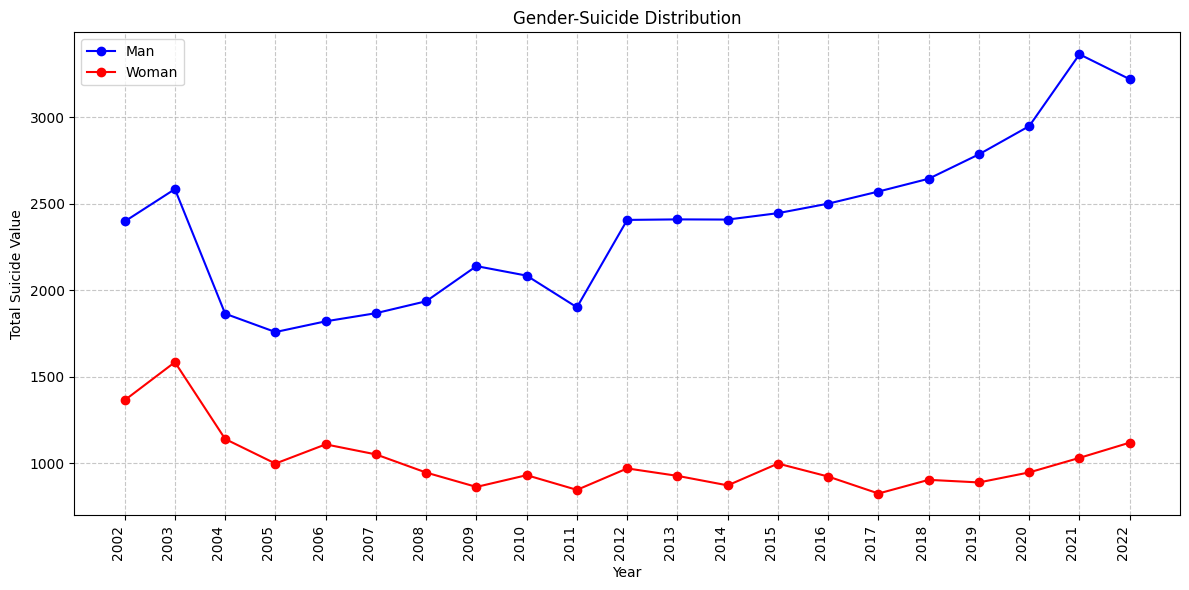

In [85]:
# Filter 'erkek' and 'Kadın' columns
man_columns = [columns for columns in new_suicide_gender_year.columns if 'Erkek' in columns]
woman_columns = [columns for columns in new_suicide_gender_year.columns if 'Kadın' in columns]

# Create a new column contain mans
new_suicide_gender_year['Total_man'] = new_suicide_gender_year[man_columns].sum(axis=1)
new_suicide_gender_year['Total_woman'] = new_suicide_gender_year[woman_columns].sum(axis=1)

fig, ax = plt.subplots(figsize=(12, 6))

# Man and Woman lines
ax.plot(new_suicide_gender_year['year'], new_suicide_gender_year['Total_man'], label='Man', marker='o', linestyle='-', color='b')
ax.plot(new_suicide_gender_year['year'], new_suicide_gender_year['Total_woman'], label='Woman', marker='o', linestyle='-', color='r')

# X-axis labels
ax.set_xticks(new_suicide_gender_year['year'])
ax.set_xticklabels(new_suicide_gender_year['year'], rotation=90, ha='right')

# Grid ekleme
ax.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Total Suicide Value')
plt.title('Gender-Suicide Distribution')
plt.legend()

plt.tight_layout()  # not to mix x axis values
plt.show()

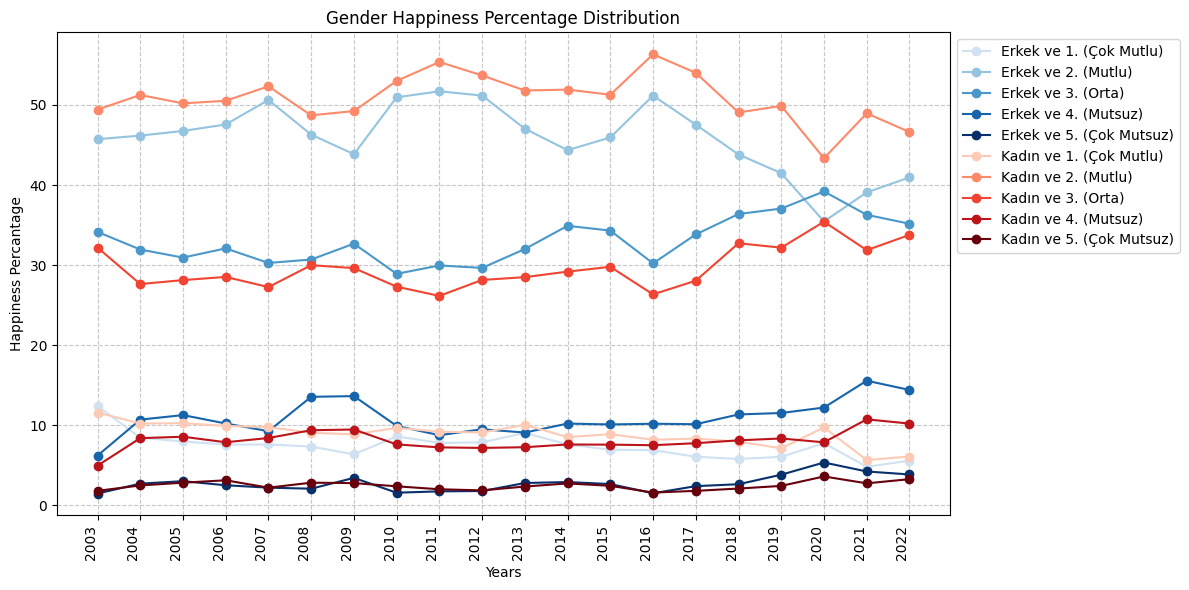

In [86]:
man_happiness_columns = gender_happiness.iloc[:, 1:6]
woman_happiness_columns = gender_happiness.iloc[:, 6:11]

fig, ax = plt.subplots(figsize=(12, 6))

man_colors = plt.cm.Blues(np.linspace(0.2, 1, len(man_happiness_columns.columns)))
woman_colors = plt.cm.Reds(np.linspace(0.2, 1, len(woman_happiness_columns.columns)))

# # Open or close this lines to see one gender distribution # #

# Man lines
for i, column in enumerate(man_happiness_columns.columns):
    ax.plot(gender_happiness['Years'], man_happiness_columns[column], label=f'{column}', marker='o', linestyle='-', color=man_colors[i])

# Woman lines
for i, column in enumerate(woman_happiness_columns.columns):
    ax.plot(gender_happiness['Years'], woman_happiness_columns[column], label=f'{column}', marker='o', linestyle='-', color=woman_colors[i])

# X-axis labels
ax.set_xticks(gender_happiness['Years'])
ax.set_xticklabels(gender_happiness['Years'], rotation=90, ha='right')

# Adding grid
ax.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Years')
plt.ylabel('Happiness Percantage')
plt.title('Gender Happiness Percentage Distribution')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Plot it outside

# not to mix x axis values
plt.tight_layout()
plt.show()

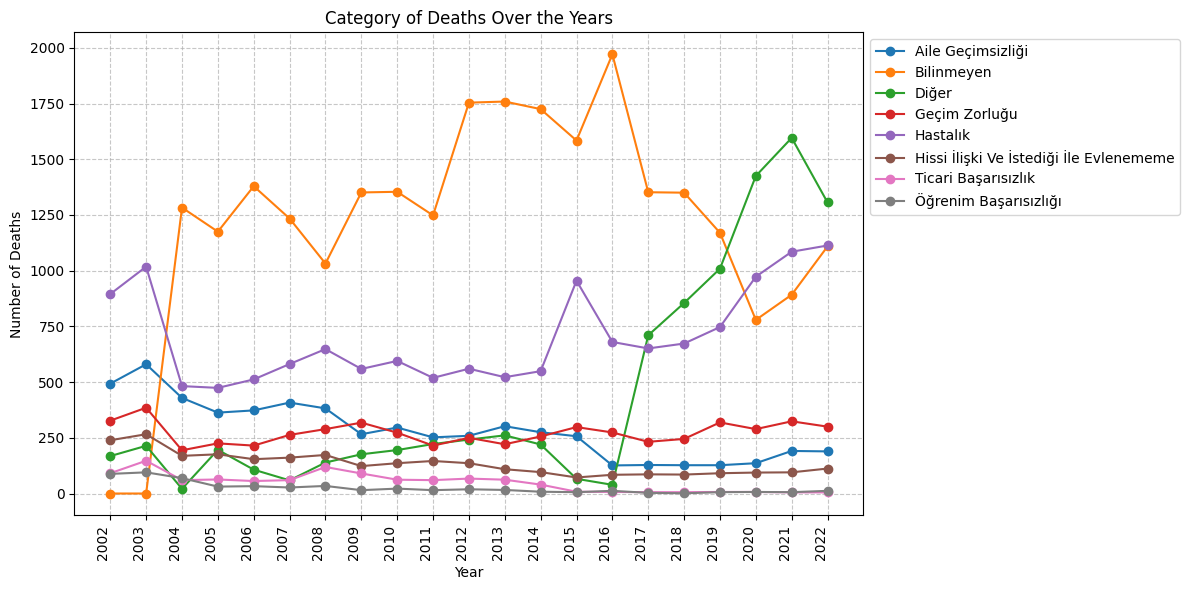

In [87]:

# Collect category columns
def sum_same_category_columns(df):
    # Group columns and sum them
    summed_df = df.groupby(df.columns.str.split(' & ').str[1], axis=1).sum()

    return summed_df

# Aynı isme sahip sütunları topla
summed_data = sum_same_category_columns(new_why_suicide_month)
summed_data.insert(0, 'Years', new_why_suicide_month['Years'])


fig, ax = plt.subplots(figsize=(12, 6))
categories = summed_data.columns[1:]

# Ploting every category seperately
for category in categories:
    ax.plot(summed_data['Years'], summed_data[category], label=category, marker='o', linestyle='-')

ax.set_xticks(summed_data['Years'])
ax.set_xticklabels(summed_data['Years'], rotation=90, ha='right')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Category of Deaths Over the Years')

# Place the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the x-axis values are not mixed
plt.tight_layout()

# Display the plot
plt.show()

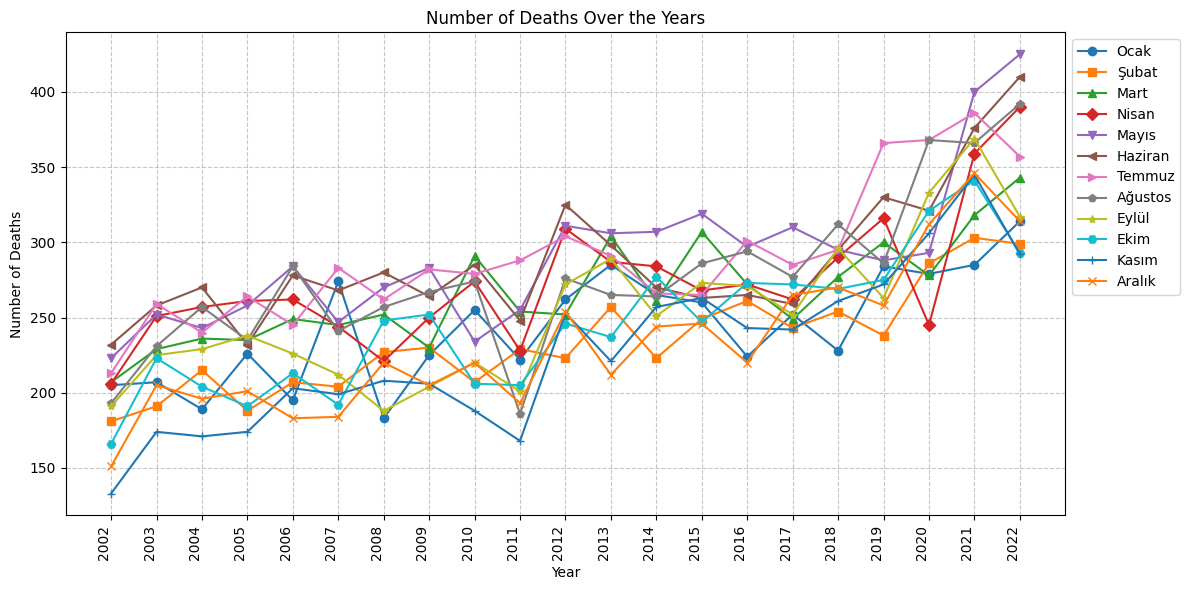

In [88]:
# Collect category columns
def sum_same_month_columns(df):
    # Group columns and sum them
    summed_df = df.groupby(df.columns.str.split(' & ').str[0], axis=1).sum()

    return summed_df

# Collect same name columns
month_suicide = sum_same_month_columns(new_why_suicide_month)
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'H', '+', 'x']

# Reindex columns in given order
months_order = ['Years','Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
month_suicide = month_suicide.reindex(columns=months_order)

fig, ax = plt.subplots(figsize=(12, 6))
Months = month_suicide.columns[1:]

# Ploting every category seperately
for i, month in enumerate(Months):
    ax.plot(month_suicide['Years'], month_suicide[month], label=month , marker=markers[i % len(markers)], linestyle='-')


ax.set_xticks(month_suicide['Years'])
ax.set_xticklabels(month_suicide['Years'], rotation=90, ha='right')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths Over the Years')

# Place the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the x-axis values are not mixed
plt.tight_layout()

# Display the plot
plt.show()

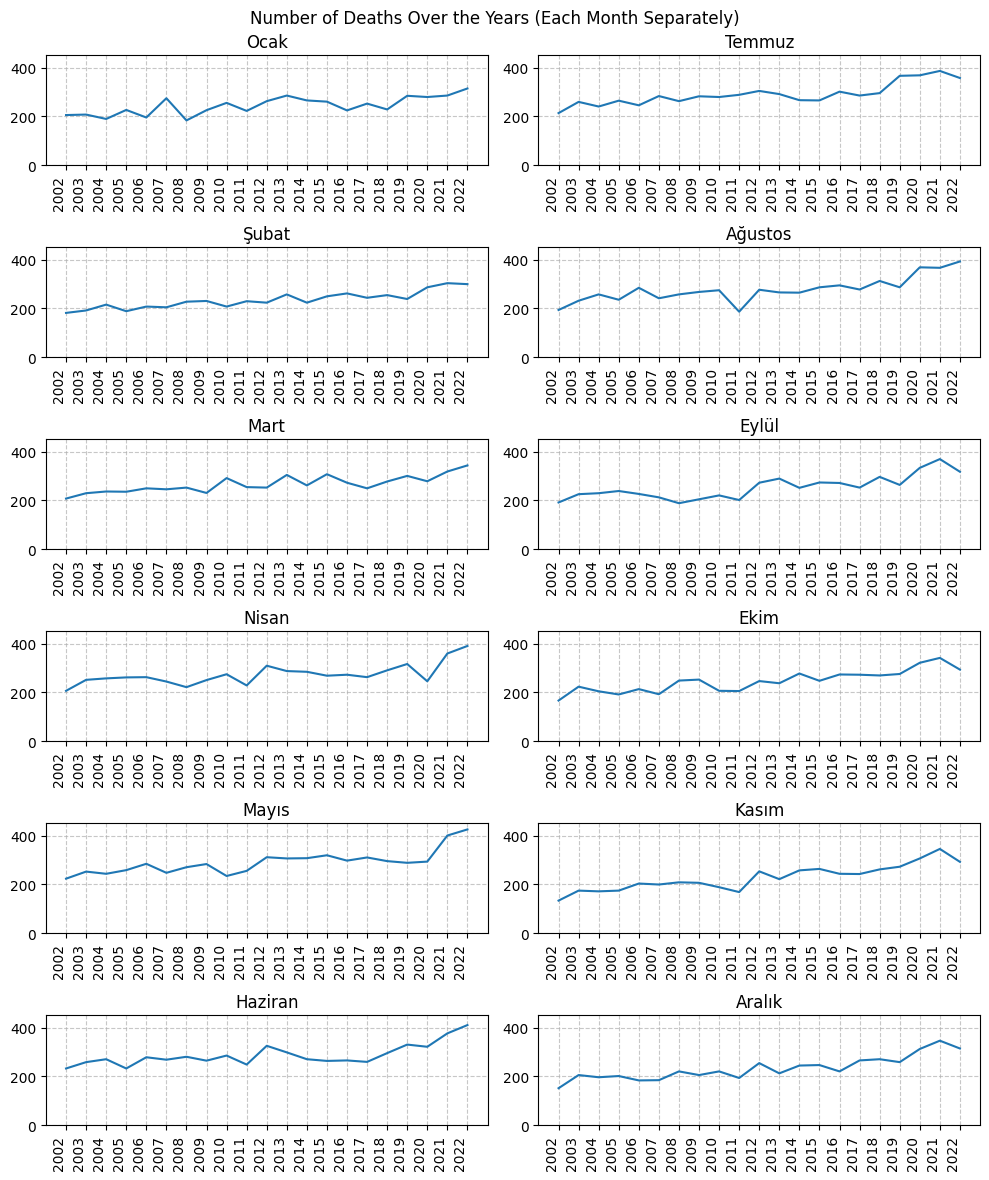

In [89]:
# Create a subplot layout with 2 columns and 6 rows
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 12))

# Plot a separate line for each month
for i, month in enumerate(months_order[1:]):
    row = i % 6
    col = i // 6
    axes[row, col].plot(month_suicide['Years'], month_suicide[month], label=month, linestyle='-')
    axes[row, col].set_title(month)
    axes[row, col].set_xticks(month_suicide['Years'])
    axes[row, col].set_xticklabels(month_suicide['Years'], rotation=90, ha='right')
    axes[row, col].grid(True, linestyle='--', alpha=0.7)

    # Set the y-axis limit for each subplot
    axes[row, col].set_ylim(0, 450)

# Adjust the subplot layout
plt.tight_layout()

# Add a main title
fig.suptitle('Number of Deaths Over the Years (Each Month Separately)')

# Display the plot
plt.tight_layout()
plt.show()

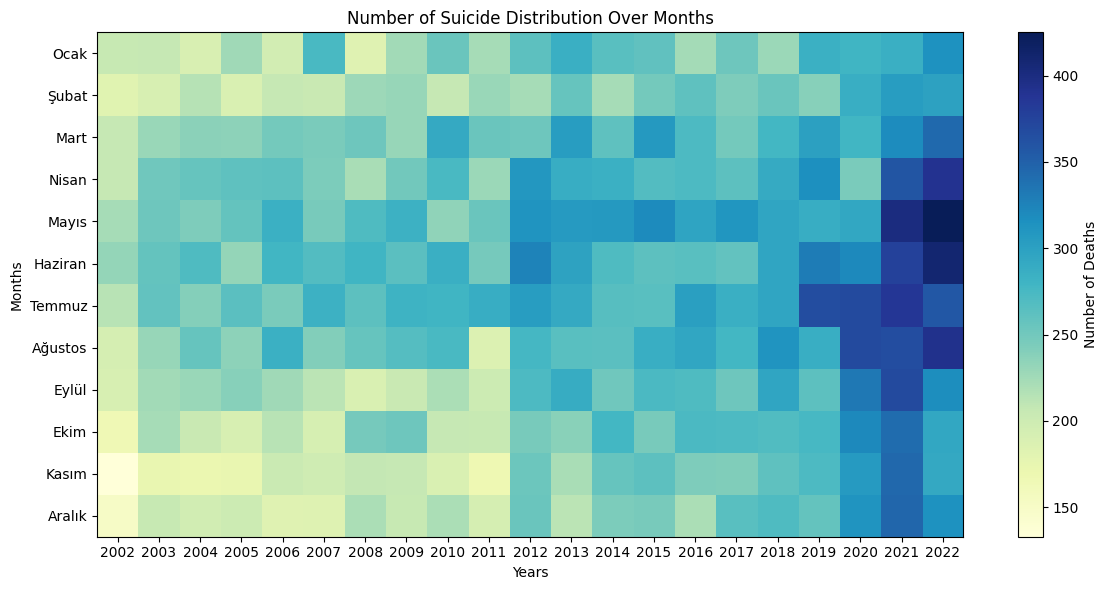

In [90]:
# I thought heatmap will be better for visualizing this case

# Prepare the Data
heatmap_data = month_suicide.set_index('Years').T.values

# Take Year and Month Columns
years = month_suicide['Years'].values
months = month_suicide.columns[1:]

# Use year and month names as index
heatmap_df = pd.DataFrame(heatmap_data, index=months, columns=years)

# Heatmap çizimi
plt.figure(figsize=(12, 6))
plt.imshow(heatmap_df, cmap='YlGnBu', aspect='auto', interpolation='nearest')

# Labeling
plt.xlabel('Years')
plt.ylabel('Months')
plt.title('Number of Suicide Distribution Over Months')

# Replace namings with proper ones
plt.xticks(np.arange(len(years)), years)
plt.yticks(np.arange(len(months)), months)

plt.colorbar(label='Number of Deaths')

# Show the plot
plt.tight_layout()
plt.show()

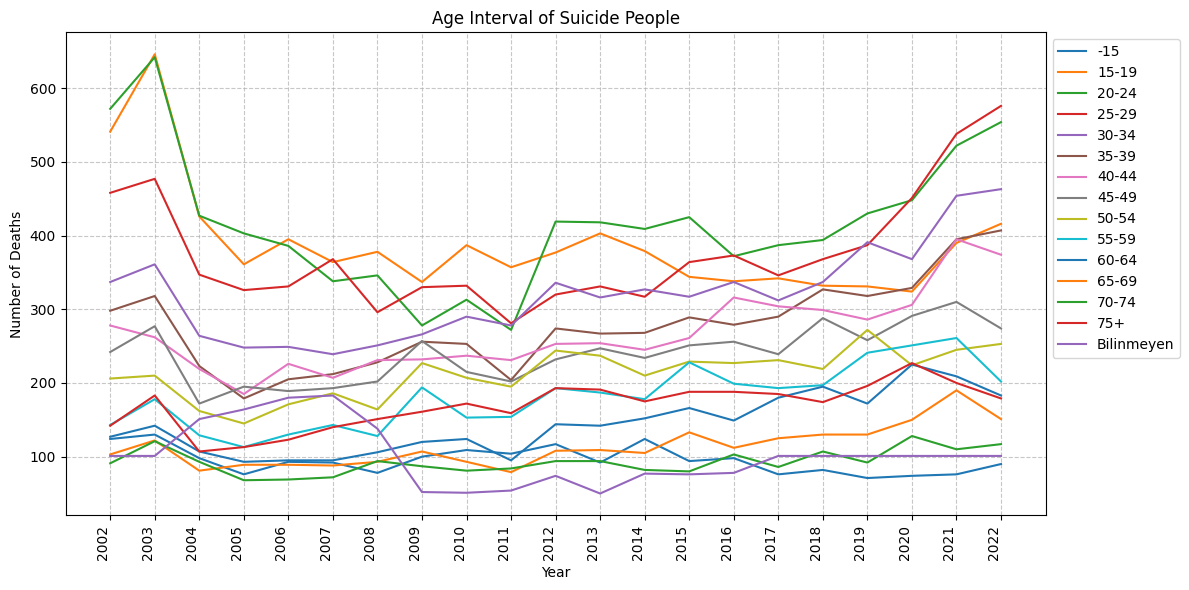

In [91]:
# Collect category columns
def sum_same_age_columns(df):
    # Group columns and sum them
    summed_df = df.groupby(df.columns.str.split(' & ').str[2], axis=1).sum()

    return summed_df

# Collect same age columns
age_suicide = sum_same_age_columns(new_suicide_gender_year)

fig, ax = plt.subplots(figsize=(12, 6))
Ages = age_suicide.columns

# Ploting every category separately
for age in Ages:
    ax.plot(new_suicide_gender_year['year'], age_suicide[age], linestyle='-', label=age)

ax.set_xticks(new_suicide_gender_year['year'])
ax.set_xticklabels(new_suicide_gender_year['year'], rotation=90, ha='right')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Age Interval of Suicide People')

# Place the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the x-axis values are not mixed
plt.tight_layout()
plt.show()

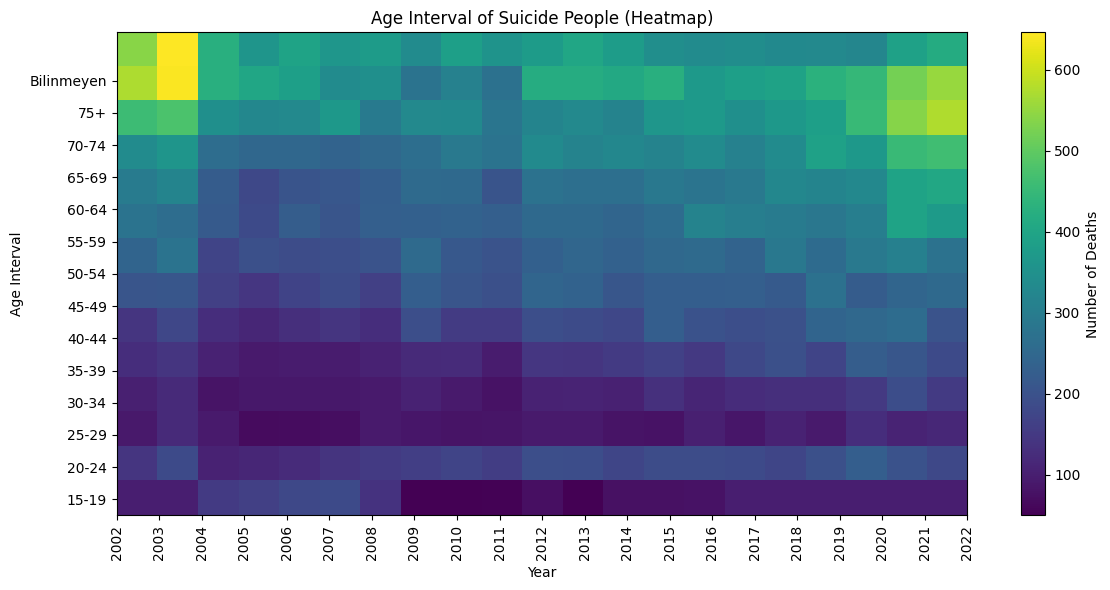

In [92]:
# Collect category columns
def sum_same_age_columns(df):
    # Group columns and sum them
    summed_df = df.groupby(df.columns.str.split(' & ').str[2], axis=1).sum()

    return summed_df

# Collect same age columns
age_suicide = sum_same_age_columns(new_suicide_gender_year)

fig, ax = plt.subplots(figsize=(12, 6))

# Create a heatmap using imshow
heatmap = ax.imshow(age_suicide.iloc[:, 1:].T, cmap='viridis', aspect='auto', extent=[new_suicide_gender_year['year'].min(), new_suicide_gender_year['year'].max(), 0, len(age_suicide.columns)])

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Number of Deaths')

ax.set_xticks(new_suicide_gender_year['year'])
ax.set_xticklabels(new_suicide_gender_year['year'], rotation=90, ha='center')

ax.set_yticks(np.arange(len(age_suicide.columns[1:])) + 0.5)
ax.set_yticklabels(age_suicide.columns[1:])

plt.xlabel('Year')
plt.ylabel('Age Interval')
plt.title('Age Interval of Suicide People (Heatmap)')

# Ensure the x-axis values are not mixed
plt.tight_layout()
plt.show()

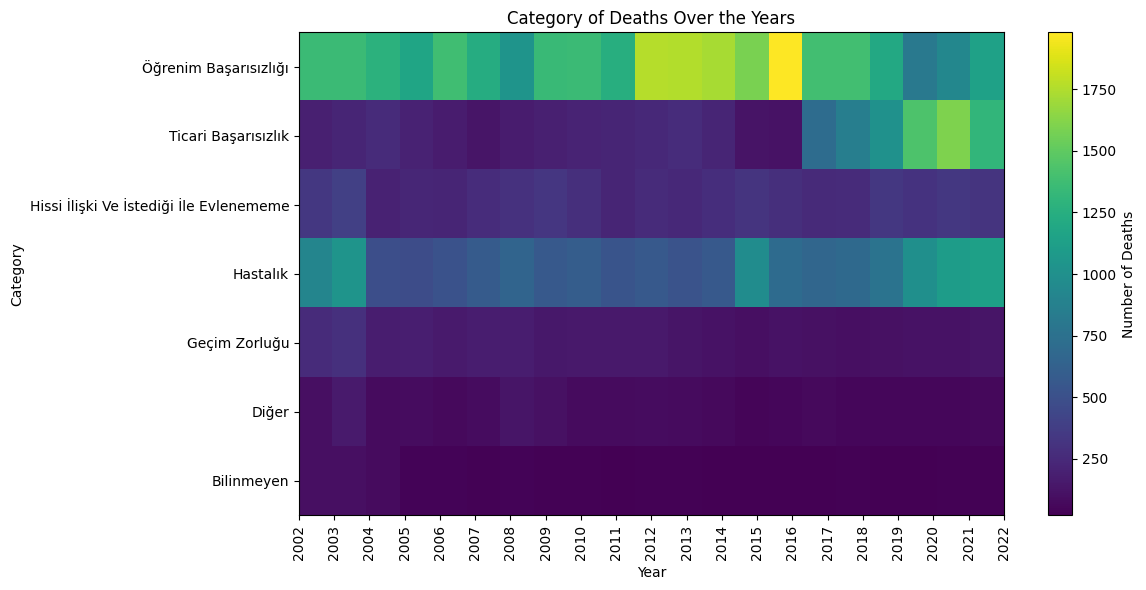

In [93]:
# To prove all data from TUIK have same graph representation I've done this visualization with another datasource

# Collect category columns
def sum_same_reason_columns(df):
    # Group columns and sum them
    summed_df = df.groupby(df.columns.str.split(' & ').str[1], axis=1).sum()

    return summed_df

# Collect same age columns
age_suicide = sum_same_reason_columns(new_suicide_gender_year)

fig, ax = plt.subplots(figsize=(12, 6))

# Create a heatmap using imshow
heatmap = ax.imshow(age_suicide.iloc[:, 1:].T, cmap='viridis', aspect='auto', extent=[new_suicide_gender_year['year'].min(), new_suicide_gender_year['year'].max(), 0, len(age_suicide.columns[1:])])

# Add colorbar
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Number of Deaths')

ax.set_xticks(new_suicide_gender_year['year'])
ax.set_xticklabels(new_suicide_gender_year['year'], rotation=90, ha='center')

ax.set_yticks(np.arange(len(age_suicide.columns[1:])) + 0.5)
ax.set_yticklabels(age_suicide.columns[1:])

plt.xlabel('Year')
plt.ylabel('Category')
plt.title('Category of Deaths Over the Years')

# Ensure the x-axis values are not mixed
plt.tight_layout()
plt.show()

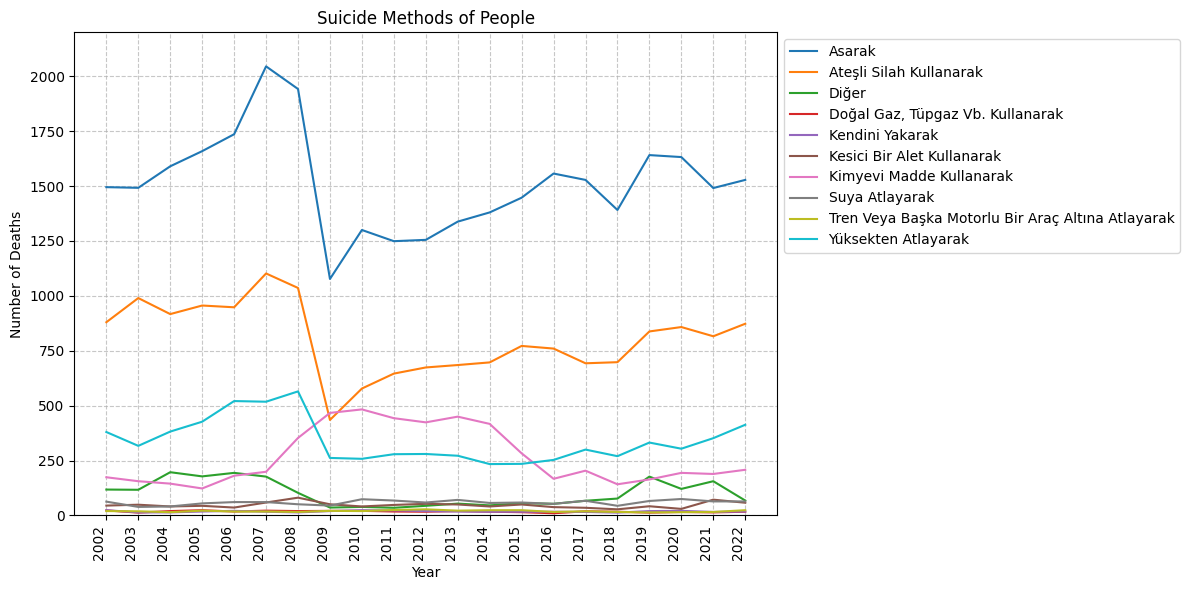

In [94]:
# Collect category columns
def sum_same_dm_columns(df):
    # Group columns and sum them
    summed_df = df.groupby(df.columns.str.split(' & ').str[0], axis=1).sum()
    return summed_df

# Collect same method columns
dm_suicide = sum_same_dm_columns(sorted_education_level_and_suicide)
dm_suicide = dm_suicide.drop('Years', axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
Methods = dm_suicide.columns

# Ploting every category separately
for method in Methods:
    ax.plot(sorted_education_level_and_suicide['Years'], dm_suicide[method], linestyle='-', label=method)

ax.set_xticks(sorted_education_level_and_suicide['Years'])
ax.set_xticklabels(sorted_education_level_and_suicide['Years'], rotation=90, ha='right')

# Set a fixed y-axis range for better comparison
ax.set_ylim(0, 2200)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Suicide Methods of People')

# Place the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ensure the x-axis values are not mixed
plt.tight_layout()
plt.show()


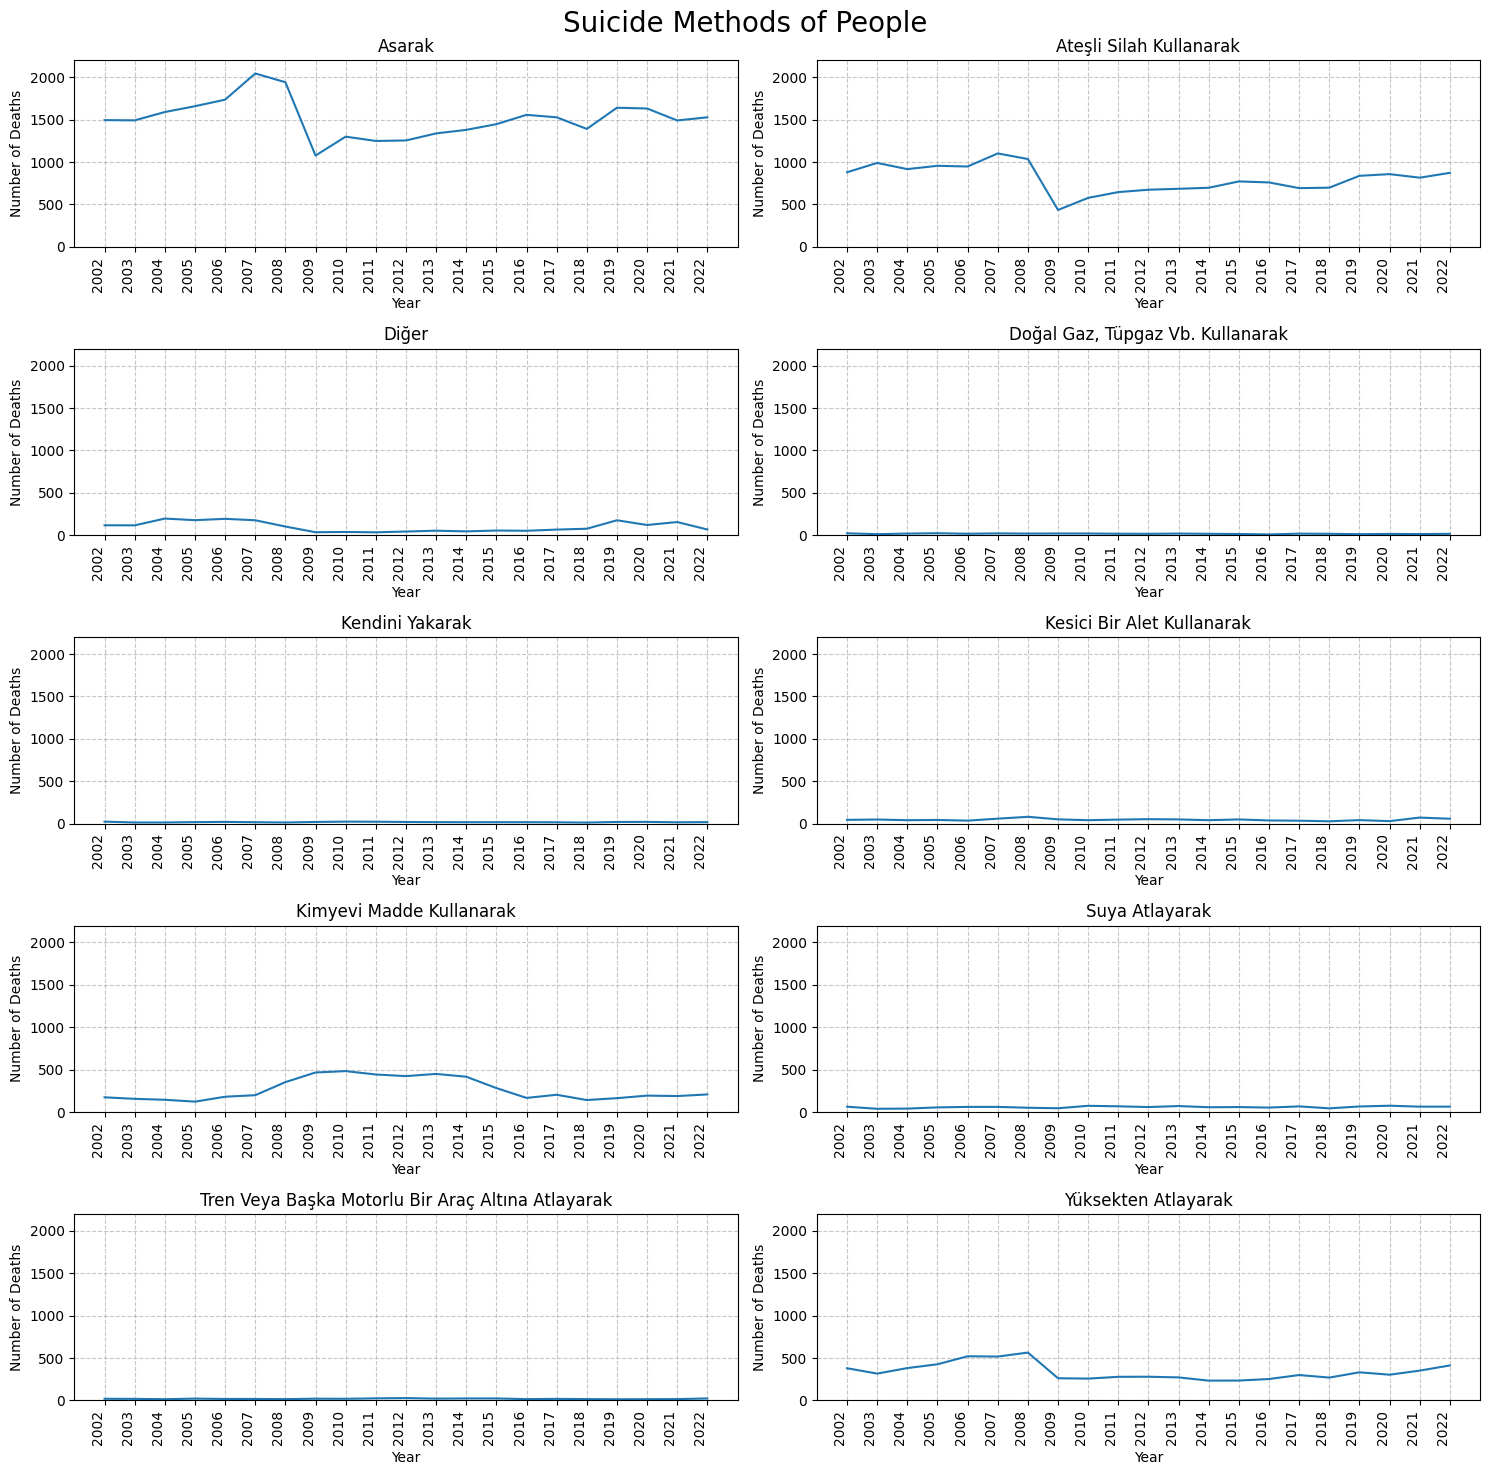

In [95]:
# Collect category columns
def sum_same_dm_columns(df):
    # Group columns and sum them
    summed_df = df.groupby(df.columns.str.split(' & ').str[0], axis=1).sum()
    return summed_df

# Collect same age columns
dm_suicide = sum_same_dm_columns(sorted_education_level_and_suicide)
dm_suicide = dm_suicide.drop('Years', axis=1)

# Extract years and categories
years = sorted_education_level_and_suicide['Years']
d_ways = dm_suicide.columns

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Plotting..
for i, category in enumerate(d_ways):
    ax = axes[i]
    ax.plot(years, dm_suicide[category], linestyle='-', label=category)
    ax.set_title(category)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Deaths')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Set x-axis ticks and rotate labels
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=90, ha='right')

    # Set a fixed y-axis range for better comparison
    ax.set_ylim(0, 2200)

plt.suptitle('Suicide Methods of People', fontsize = 20)
plt.tight_layout()
plt.show()


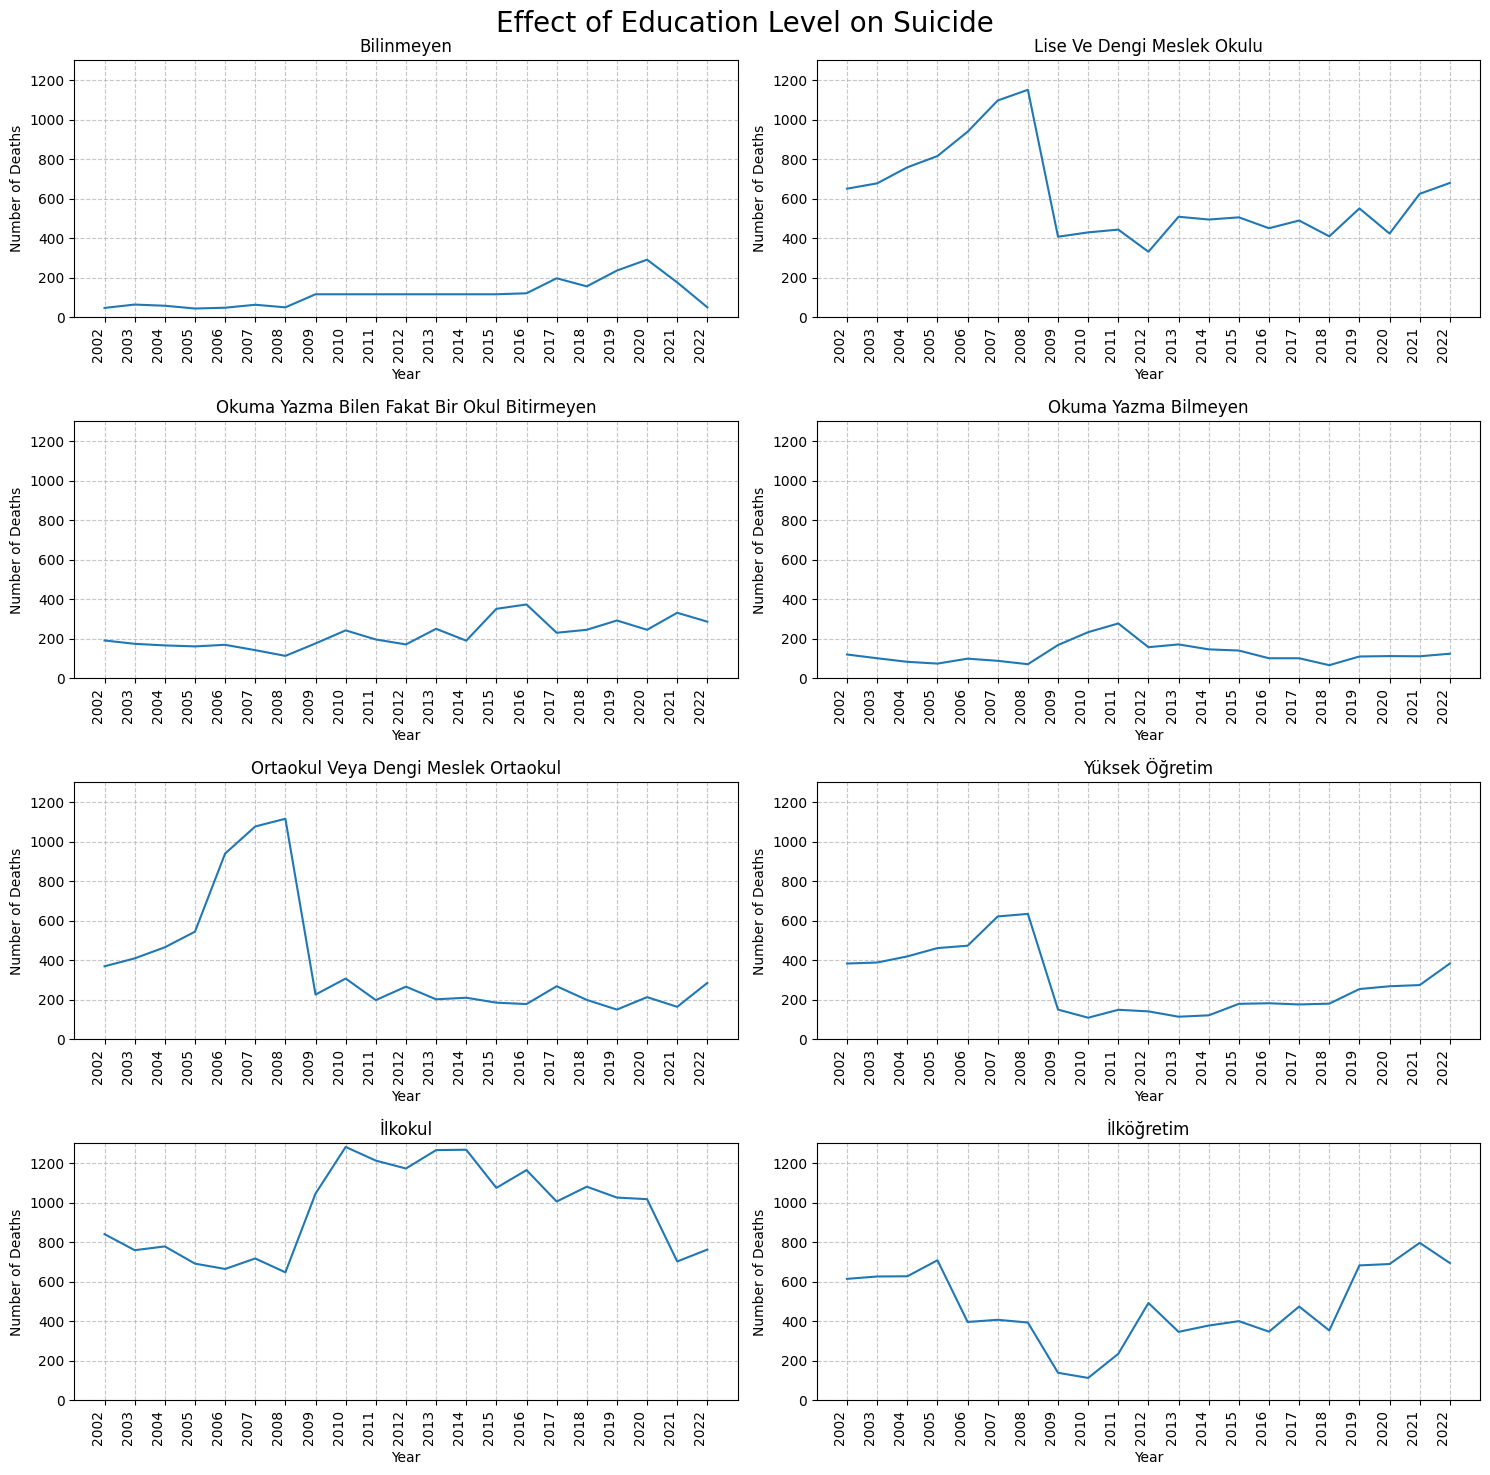

In [96]:
# Collect category columns
def sum_same_education_columns(df):
    # Group columns and sum them
    summed_df = df.groupby(df.columns.str.split(' & ').str[1], axis=1).sum()
    return summed_df

# Collect same age columns
education_suicide = sum_same_education_columns(sorted_education_level_and_suicide)

# Extract years and categories
years = sorted_education_level_and_suicide['Years']
edu_level = education_suicide.columns

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Plotting..
for i, edu in enumerate(edu_level):
    ax = axes[i]
    ax.plot(years, education_suicide[edu], linestyle='-', label=edu)
    ax.set_title(edu)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Deaths')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Set x-axis ticks and rotate labels
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=90, ha='right')

    # Set a fixed y-axis range for better comparison
    ax.set_ylim(0, 1300)

plt.suptitle('Effect of Education Level on Suicide', fontsize = 20)
plt.tight_layout()
plt.show()

In [97]:
age_standardized_suicide

,ParentLocation,SpatialDimValueCode,Location,Year,IsLatestYear,Sex,Dim1ValueCode,FactValueNumericLow,FactValueNumericHigh,Value
0,Eastern Mediterranean,AFG,Afghanistan,2019,True,Both sexes,BTSX,3.40,9.91,6.51
1,Eastern Mediterranean,AFG,Afghanistan,2018,False,Both sexes,BTSX,3.38,9.81,6.43
2,Eastern Mediterranean,AFG,Afghanistan,2017,False,Both sexes,BTSX,3.42,9.88,6.46
3,Eastern Mediterranean,AFG,Afghanistan,2016,False,Both sexes,BTSX,3.48,9.93,6.45
4,Eastern Mediterranean,AFG,Afghanistan,2015,False,Both sexes,BTSX,3.48,9.88,6.40
...,...,...,...,...,...,...,...,...,...,...
10975,Africa,ZWE,Zimbabwe,2004,False,Male,MLE,15.60,45.71,30.11
10976,Africa,ZWE,Zimbabwe,2003,False,Male,MLE,15.47,44.31,28.84
10977,Africa,ZWE,Zimbabwe,2002,False,Male,MLE,15.73,44.80,29.07
10978,Africa,ZWE,Zimbabwe,2001,False,Male,MLE,15.11,42.78,27.67


In [98]:
age_standardized_suicide[age_standardized_suicide.ParentLocation == 'Europe'].Location.unique()

array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Kazakhstan', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Tajikistan',
       'The former Yugoslav Republic of Macedonia', 'Turkmenistan',
       'Türkiye', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland',
       'Uzbekistan'], dtype=object)

##How Turkey compares with other regions ?

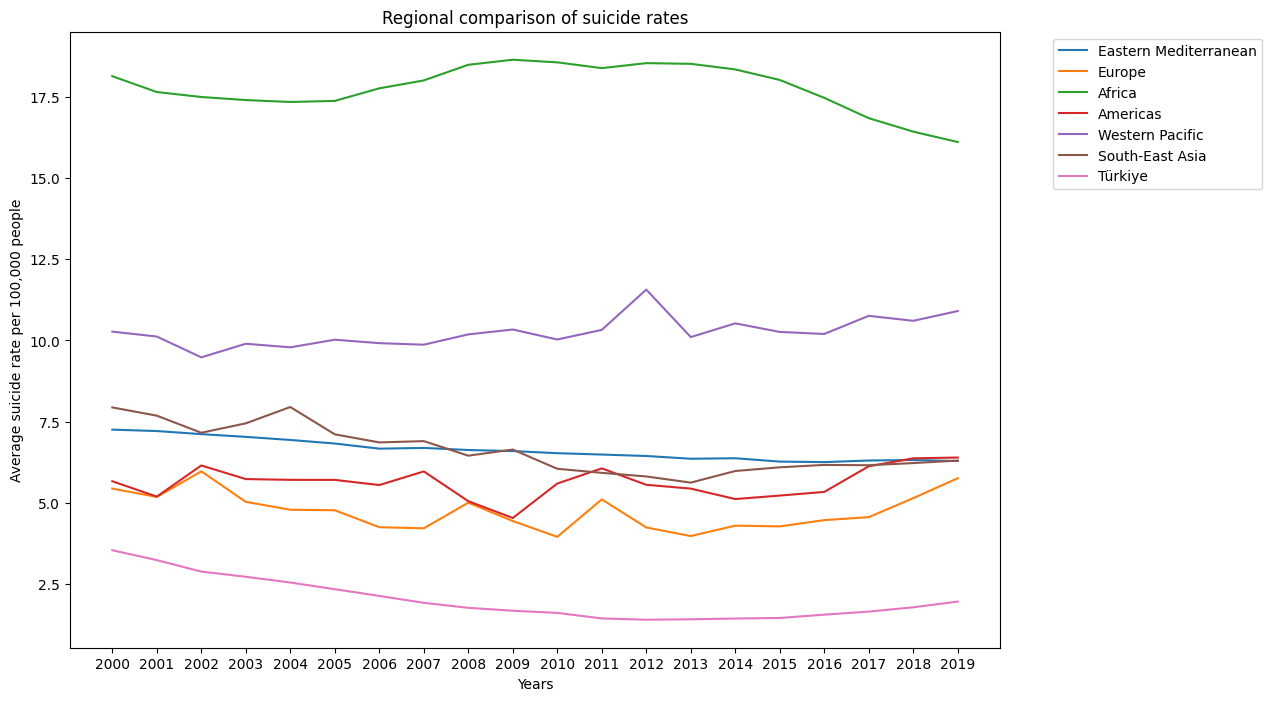

In [99]:
# Convert the 'Year' column to integers
age_standardized_suicide['Year'] = age_standardized_suicide['Year'].astype(int)

# Convert the 'Value' column to a numerical format
age_standardized_suicide['Value'] = pd.to_numeric(age_standardized_suicide['Value'], errors='coerce')

# Grouping and calculating the mean
for region in age_standardized_suicide['ParentLocation'].unique():
    who_regional = age_standardized_suicide[age_standardized_suicide['ParentLocation'] == region]
    
    # Exclude non-numeric values before calculating the mean
    numeric_values = pd.to_numeric(who_regional['Value'], errors='coerce')
    who_regional_mean = numeric_values.groupby(who_regional['Year']).mean()
    
    plt.plot(who_regional_mean.index, who_regional_mean, label=region)

# Draw a separate line for Turkey
turkiye_data = age_standardized_suicide[age_standardized_suicide['Location'] == 'Türkiye']
turkiye_numeric_values = pd.to_numeric(turkiye_data['Value'], errors='coerce')
turkiye_mean = turkiye_numeric_values.groupby(turkiye_data['Year']).mean()

plt.plot(turkiye_mean.index, turkiye_mean, label='Türkiye')
plt.xticks(np.arange(int(age_standardized_suicide['Year'].min()), int(age_standardized_suicide['Year'].max()) + 1, 1))
plt.gcf().set_size_inches(12, 8)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Years')
plt.ylabel('Average suicide rate per 100,000 people')
plt.title('Regional comparison of suicide rates')
plt.show()


##Analysis of the data using machine learning techniques

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import zscore
from sklearn.metrics import r2_score

In [101]:

X = gender_happiness['Years'].values.reshape(-1, 1)  # model expects NumPy array
y = gender_happiness['Erkek ve 1. (Çok Mutlu)']  # returns a pandas series, model automatically turns its type to NumPy series while processing

# Split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on text dataset
y_pred = model.predict(X_test)

# Is it a good model?
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Evaluate the model's performance using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
score = model.score(X_test, y_test)
print(f'Model Score (R-squared): {score}')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

# Predict future years
future_years = [2023, 2024, 2025]
future_X = np.array(future_years).reshape(-1, 1)
future_predictions = model.predict(future_X)

# Print future predicts
print(f'Predicted values:\n{future_predictions}')

Mean Squared Error: 1.202588258989606
R-squared: 0.25444001302566277
Model Score (R-squared): 0.25444001302566277
Cross-Validation Scores: [ -0.39643472   0.79502231 -23.21649138   0.02760918  -2.24011523]
Mean Cross-Validation Score: -5.006081968235039
Predicted values:
[5.19771765 4.99363294 4.78954824]


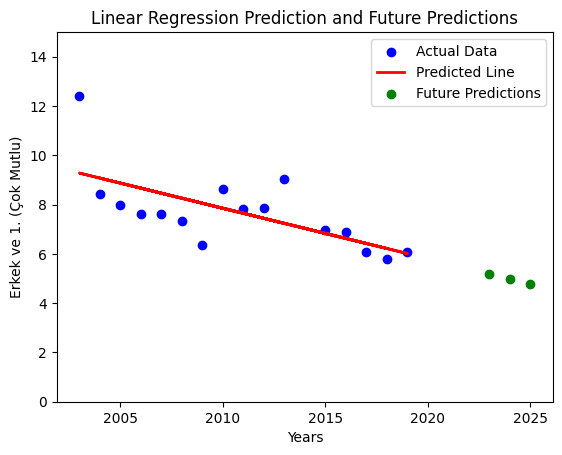

In [102]:
# Plot actual data
plt.scatter(X_train, y_train, color='blue', label='Actual Data')

# Plot predicted values
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Predicted Line')

# Plot future predictions
plt.scatter(future_years, future_predictions, color='green', label='Future Predictions')

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Erkek ve 1. (Çok Mutlu)')
plt.title('Linear Regression Prediction and Future Predictions')

# Add legend
plt.legend()

# Set Y axis limit
plt.ylim(0, 15)

# Show the plot
plt.show()

In [103]:
# Let's try another machine learning algorithm to predict happiest men percentages
X = gender_happiness['Years'].values.reshape(-1, 1)
y = gender_happiness['Erkek ve 1. (Çok Mutlu)']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

from sklearn.model_selection import cross_val_score

# Evaluate the model's performance using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predict future years
future_years = [2023, 2024, 2025, 3500]
future_X = np.array(future_years).reshape(-1, 1)
future_predictions = model.predict(future_X)

# Print future predictions
print(f'Predicted values:\n{future_predictions}')

Cross-Validation Scores: [ -2.1620832   -0.2116646   -0.81296635 -11.40205104  -0.10809304]
Mean Cross-Validation Score: -2.939371644068633
Mean Squared Error: 0.3654249999999998
Predicted values:
[4.83 4.83 4.83 4.83]


As visible, values were estimated by extrapolation of the linear behaviour of the available data using linear regression. Moreover, the available data appears to ne unfit for analysis. Let's try our chance for more stabilize datasets. The model that has the lowest MSE (Mean Squared Error) is chosen. We note that the modification of the random_state may result in different errors

Furthermore, the decision tree algorithm appears to ahve encountered an overfitting problem. We can thus conclude that it is not an approriate aproximation.

In [104]:
new_suicide_gender_year = new_suicide_gender_year.set_index('year')

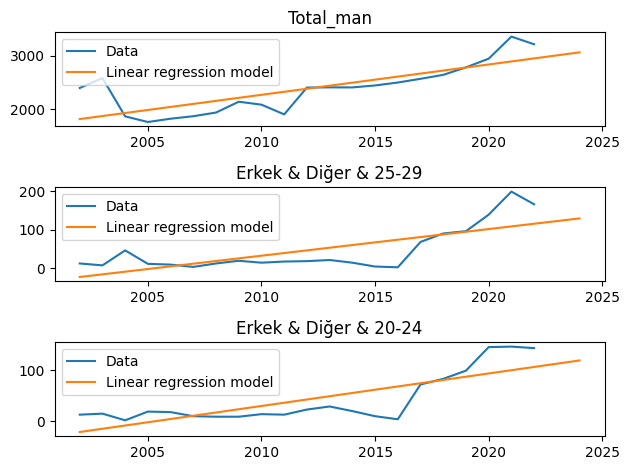

In [105]:
highest_increase = [[], []]


#We look for the cases who saw the highest increase relative in the mean
#of the suicide rates of the last three years of the dataset relative to 2002

for text in new_suicide_gender_year.columns:
  initial = new_suicide_gender_year.loc[:,text][2002]
  temp = []
  for i in range(3):
    final = new_suicide_gender_year.loc[:, text][2020+i]
    temp.append((final-initial)/(18+i))
  highest_increase[0].append(sum(temp)/3)
  highest_increase[1].append(text)

increase= pd.DataFrame({'values': highest_increase[0],'text': highest_increase[1]})

increase = increase.sort_values('values',ascending= False ).reset_index()

fig, ax = plt.subplots(3)

for i in range(3):
  ax[i].plot(new_suicide_gender_year.index,new_suicide_gender_year[increase.iloc[i,2]], label='Data')
  ax[i].set_title(increase.iloc[i,2])

  regression= LinearRegression().fit(pd.DataFrame(new_suicide_gender_year.index), new_suicide_gender_year[[increase.iloc[i,2]]])

  x = np.arange(2002,2025)
  y = x*regression.coef_ + regression.intercept_

  ax[i].plot(x,y[0], label='Linear regression model')
  ax[i].legend()

fig.tight_layout()


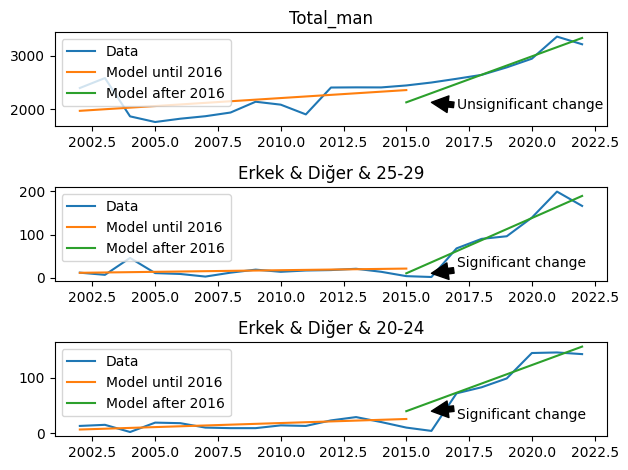

In [106]:
fig, ax= plt.subplots(3)

for i in range(3):
  ax[i].plot(new_suicide_gender_year.index,new_suicide_gender_year[increase.iloc[i,2]], label='Data')
  ax[i].set_title(increase.iloc[i,2])

  x_d = list(new_suicide_gender_year.index)

  regression= LinearRegression().fit(pd.DataFrame(x_d[:16]), new_suicide_gender_year[[increase.iloc[i,2]]].iloc[:16])
  regression2 = LinearRegression().fit(pd.DataFrame(x_d[16:]), new_suicide_gender_year[[increase.iloc[i,2]]].iloc[16:])

  x = np.arange(2002,2016)
  x2= np.arange(2015,2023)

  y = x*regression.coef_ + regression.intercept_
  y2= x2*regression2.coef_ + regression2.intercept_


  ax[i].plot(x,y[0], label='Model until 2016')
  ax[i].plot(x2,y2[0], label='Model after 2016')
  if i==0:
    ax[i].annotate('Unsignificant change', xy=(2016,y2[0][0]), xytext=(2017, 2000),arrowprops= {'color': 'black'})
  else:
    ax[i].annotate('Significant change', xy=(2016,y2[0][0]), xytext=(2017, 25), arrowprops= {'color': 'black'})

  ax[i].legend(loc='upper left')

fig.tight_layout()

We notice a change in the linear behaviour of the data at the period around 2015, 2016 and 2017.

In [107]:
# Lets try another dataset
X = gender_happiness['Years'].values.reshape(-1, 1)  # model expects NumPy array
y = gender_happiness['Kadın ve 5. (Çok Mutsuz)']  # returns a pandas series, model automatically turns its type to NumPy series while processing

# Split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# I didn't specify a random_state for this because we have similar unhappines percentages for different years

# Create model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on text dataset
y_pred = model.predict(X_test)

# Is it a good model?
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Evaluate the model's performance using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

# Predict future years
future_years = [2023, 2024, 2025]
future_X = np.array(future_years).reshape(-1, 1)
future_predictions = model.predict(future_X)

# Print future predicts
print(f'Predicted values:\n{future_predictions}')

Mean Squared Error: 0.5735777239056656
R-squared: -14.439508045912952
Cross-Validation Scores: [-3.08485297 -1.1303386  -0.31024352 -0.09666193  0.02802508]
Mean Cross-Validation Score: -0.91881438927023
Predicted values:
[2.77414346 2.78803681 2.80193016]


While a low MSE means accurate predictions, a negative R-squared implies that the model is not effective in describing how the independent variables influence the dependent variable when compared to a basic average model.

#What are the major causes behind the observed patterns in suicide rates over the years?

We notice from the data a change around 2016. Also, we notice that the segments of the population impacted the most are in between 20 and 34 years old who are of working age.  We can infer from these observations that a social or economic event with important impact occured in the country. For instance, the trade and tariff conflict between Turkey and the USA in 2018, like the doubing of tariffs on Turkish steel, may have negatively impacted the economy. According to the Steel Exporters' Association, the steel industry is the fourth largest turkish export by value exceeding 30 million tons annually.

Therefore, an economic and social impact may be an important factor

##Applications of the product of the study

The product of this study is more government and non-profit organization focused. It can for example be used as part of a government's suicide prevention policy.

Suicide is a problem that needs to be addressed. According to the WHO, around 700 000 people suicide every year. Suicide pervention is therefore crucial. Measures that can be taken include raising awareness about the danger of suicide to the public, especially the youth, and increasing mutual help especially in times of social and economic difficulty by giving more aid to the needy. All of these relate very well to a government who can start a suicide prevention campaign aimed in particular to sections of the population with high observed rates.

#Possible ethical issues

As the product of our research effort is more non-profit focused, and the data concerns national and regional trends taken from governments and organizations, the types ethical issues we may face are different.

Indeed, because the data received and used do not contain any personal or individual information, most ethical problems when gathering the data or at deployment are in ensuring the use of publicly available data and to have the consent of all parties at all time.